# Макроэкономические воздействия - домашняя работа

#### Импортируем нужные библиотеки

In [1]:
# Подключаем библиотеки

%matplotlib inline

import pandas as pd
import numpy as np
import datetime as dt                     # библиотеки 
import dateutil                           # для работы с датами 
import matplotlib.pyplot as plt
from ipywidgets import interactive
from scipy.optimize import minimize
from sklearn.metrics import r2_score

#### Считываем данные из датасета, который был на семинаре

In [1]:
# df = pd.read_csv(
#     'seminar7_20181101.csv',
#     sep=";",
#     encoding= "cp1251",
#     date_parser=lambda x: pd.to_datetime(x, format='%d%b%Y'), #преобразуем даты
#     parse_dates=['generation_month']
# )
# #df.head(10)

In [2]:
#df.describe()

## Построим кривую доли людей в просрочке

#### Задание 1
* Убедиться в наличии календарных воздействий на кривую $$\text{Delinquency ratio}_n =  \frac{\text{#DLQ}_n}{\text{#ACT}_n}.$$
Построить винтажи по месяцам жизни клиента и винтажи по календарным месяцам (как на слайдах 9-10 из презентации). (***2 балла***)

### По месяцам жизни клиента, январи всех лет

In [4]:
# Делаем список бакетов
buckets = df['pd_bucket'].drop_duplicates().sort_values(ascending = True)

def plot_dlq_ratio_by_statement_num(pd_bucket):
    
    # Выбираем один бакет 
    cur_df = df.query('pd_bucket == ' + str(pd_bucket))
    # Выбираем только поколения январей
    cur_df = cur_df.query('''generation_month in ('2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01', '2016-01-01','2017-01-01') ''')
    (cur_df.groupby(["generation_month",'pd_bucket', "statement_num"])
            .agg({"dlq_ratio":np.sum})
            .unstack('generation_month')
            ['dlq_ratio']
            .plot(ax=None, figsize=(15, 9), grid=True, lw = 3))
    plt.legend(loc='center left',bbox_to_anchor=(1, 0.5), fontsize = '17')
    plt.title("Кривая Dlq ratio", size=20, verticalalignment='bottom')
    plt.xlabel("Месяц жизни клиента", size=15)
    plt.tick_params(axis='both', which='major', labelsize=14)

# Отображаем его при помощи ipywidget, чтобы получить интерактивность
vintages_graph = interactive(plot_dlq_ratio_by_statement_num, pd_bucket = buckets)
vintages_graph

interactive(children=(Dropdown(description='pd_bucket', options=(1, 2, 3, 4, 5), value=1), Output()), _dom_cla…

### По месяцам жизни клиента, январи четырех лет

In [5]:
def plot_dlq_ratio_by_statement_num(pd_bucket):
    
    # Выбираем один бакет 
    cur_df = df.query('pd_bucket == ' + str(pd_bucket))
    # Выбираем только поколения январей
    cur_df = cur_df.query('''generation_month in ('2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01') ''')
    (cur_df.groupby(["generation_month",'pd_bucket', "statement_num"])
            .agg({"dlq_ratio":np.sum})
            .unstack('generation_month')
            ['dlq_ratio']
            .plot(ax=None, figsize=(15, 9), grid=True, lw = 3))
    plt.legend(loc='center left',bbox_to_anchor=(1, 0.5), fontsize = '17')
    plt.title("Кривая Dlq ratio", size=20, verticalalignment='bottom')
    plt.xlabel("Месяц жизни клиента", size=15)
    plt.tick_params(axis='both', which='major', labelsize=14)

# Отображаем его при помощи ipywidget, чтобы получить интерактивность
vintages_graph = interactive(plot_dlq_ratio_by_statement_num, pd_bucket = buckets)
vintages_graph

interactive(children=(Dropdown(description='pd_bucket', options=(1, 2, 3, 4, 5), value=1), Output()), _dom_cla…

### По месяцам жизни клиента, по всем годам

In [6]:
def plot_dlq_ratio_by_statement_num(pd_bucket):
    
    # Выбираем один бакет 
    cur_df = df.query('pd_bucket == ' + str(pd_bucket))
    (cur_df.groupby(["generation_month",'pd_bucket', "statement_num"])
            .agg({"dlq_ratio":np.sum})
            .unstack('generation_month')
            ['dlq_ratio']
            .plot(ax=None, figsize=(15, 9), grid=True, lw = 3))
    plt.title("Кривая Dlq ratio", size=20, verticalalignment='bottom')
    plt.xlabel("Месяц жизни клиента", size=15)
    plt.tick_params(axis='both', which='major', labelsize=14)

# Отображаем его при помощи ipywidget, чтобы получить интерактивность
vintages_graph = interactive(plot_dlq_ratio_by_statement_num, pd_bucket = buckets)
vintages_graph

interactive(children=(Dropdown(description='pd_bucket', options=(1, 2, 3, 4, 5), value=1), Output()), _dom_cla…

### По календарным месяцам, январи всех лет

In [7]:
#Формируем список поколений для нумерации
#0 - 1 поколение и тд
generations = sorted(list(set(df.generation_month)))
numbers = [i for i in range(len(generations))]

dictionary_of_generations = dict(zip(generations, numbers))
keys = list(dictionary_of_generations)

def change_month(index, generation):
    return index + generation

def plot_dlq_ratio_by_month_dt(pd_bucket):
    
    #Список отдельных датафреймов по поколениям в бакете
    list_of_dataframes_generations = []
    
    # Your code goes here
    # Выбираем один бакет 
    cur_df = df.query('pd_bucket == ' + str(pd_bucket))
    # Выбираем только поколения январей
    cur_df = cur_df.query('''generation_month in ('2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01', '2016-01-01','2017-01-01') ''')
    
    generations_in_bucket = sorted(set(cur_df.generation_month))
    
    cur_df = (cur_df.groupby(["generation_month",'pd_bucket', "statement_num"])
            .agg({"dlq_ratio":np.sum})
            .unstack('generation_month')
            ['dlq_ratio'])
        
    for generation in generations_in_bucket:
        list_of_dataframes_generations.append(cur_df[generation].to_frame().reset_index(drop=True, inplace=False))
    
    for ind in range(len(list_of_dataframes_generations)):
        list_of_dataframes_generations[ind] = list_of_dataframes_generations[ind]. \
        assign(index = [change_month(i, dictionary_of_generations \
                                 [list_of_dataframes_generations[ind].columns[0]]) \
                        for i in range(len(list_of_dataframes_generations[ind]))])
        list_of_dataframes_generations[ind] = list_of_dataframes_generations[ind].set_index('index')
        
    final_data_for_bucket = list_of_dataframes_generations[0]
    for ind in range(1,len(list_of_dataframes_generations)):
        final_data_for_bucket[list_of_dataframes_generations[ind].columns[0]] = list_of_dataframes_generations[ind]
    
    final_data_for_bucket.plot(ax=None, figsize=(15, 9), grid=True, lw = 3)
    
    plt.legend(loc='center left',bbox_to_anchor=(1, 0.5), fontsize = '17')
    plt.title("Кривая Dlq ratio", size=20, verticalalignment='bottom')
    plt.xlabel("Календарный месяц", size=15)
    plt.tick_params(axis='both', which='major', labelsize=14)
    
# Отображаем его при помощи ipywidget, чтобы получить интерактивность
vintages_graph = interactive(plot_dlq_ratio_by_month_dt, pd_bucket = buckets)
vintages_graph

interactive(children=(Dropdown(description='pd_bucket', options=(1, 2, 3, 4, 5), value=1), Output()), _dom_cla…

### По календарным месяцам, январи четырех лет

In [8]:
def plot_dlq_ratio_by_month_dt(pd_bucket):
    
    #Список отдельных датафреймов по поколениям в бакете
    list_of_dataframes_generations = []
    
    # Your code goes here
    # Выбираем один бакет 
    cur_df = df.query('pd_bucket == ' + str(pd_bucket))
    # Выбираем только поколения январей
    cur_df = cur_df.query('''generation_month in ('2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01') ''')
    
    generations_in_bucket = sorted(set(cur_df.generation_month))
    
    cur_df = (cur_df.groupby(["generation_month",'pd_bucket', "statement_num"])
            .agg({"dlq_ratio":np.sum})
            .unstack('generation_month')
            ['dlq_ratio'])
        
    for generation in generations_in_bucket:
        list_of_dataframes_generations.append(cur_df[generation].to_frame().reset_index(drop=True, inplace=False))
    
    for ind in range(len(list_of_dataframes_generations)):
        list_of_dataframes_generations[ind] = list_of_dataframes_generations[ind]. \
        assign(index = [change_month(i, dictionary_of_generations \
                                 [list_of_dataframes_generations[ind].columns[0]]) \
                        for i in range(len(list_of_dataframes_generations[ind]))])
        list_of_dataframes_generations[ind] = list_of_dataframes_generations[ind].set_index('index')
        
    final_data_for_bucket = list_of_dataframes_generations[0]
    for ind in range(1,len(list_of_dataframes_generations)):
        final_data_for_bucket[list_of_dataframes_generations[ind].columns[0]] = list_of_dataframes_generations[ind]
    
    final_data_for_bucket.plot(ax=None, figsize=(15, 9), grid=True, lw = 3)
    
    plt.legend(loc='center left',bbox_to_anchor=(1, 0.5), fontsize = '17')
    plt.title("Кривая Dlq ratio", size=20, verticalalignment='bottom')
    plt.xlabel("Календарный месяц", size=15)
    plt.tick_params(axis='both', which='major', labelsize=14)
    
# Отображаем его при помощи ipywidget, чтобы получить интерактивность
vintages_graph = interactive(plot_dlq_ratio_by_month_dt, pd_bucket = buckets)
vintages_graph

interactive(children=(Dropdown(description='pd_bucket', options=(1, 2, 3, 4, 5), value=1), Output()), _dom_cla…

### По календарным месяцам, по всем годам

In [9]:
def plot_dlq_ratio_by_month_dt(pd_bucket):
    
    #Список отдельных датафреймов по поколениям в бакете
    list_of_dataframes_generations = []
    
    # Your code goes here
    # Выбираем один бакет 
    cur_df = df.query('pd_bucket == ' + str(pd_bucket))
    
    generations_in_bucket = sorted(set(cur_df.generation_month))
    
    cur_df = (cur_df.groupby(["generation_month",'pd_bucket', "statement_num"])
            .agg({"dlq_ratio":np.sum})
            .unstack('generation_month')
            ['dlq_ratio'])
        
    for generation in generations_in_bucket:
        list_of_dataframes_generations.append(cur_df[generation].to_frame().reset_index(drop=True, inplace=False))
    
    for ind in range(len(list_of_dataframes_generations)):
        list_of_dataframes_generations[ind] = list_of_dataframes_generations[ind]. \
        assign(index = [change_month(i, dictionary_of_generations \
                                 [list_of_dataframes_generations[ind].columns[0]]) \
                        for i in range(len(list_of_dataframes_generations[ind]))])
        list_of_dataframes_generations[ind] = list_of_dataframes_generations[ind].set_index('index')
        
    final_data_for_bucket = list_of_dataframes_generations[0]
    for ind in range(1,len(list_of_dataframes_generations)):
        final_data_for_bucket[list_of_dataframes_generations[ind].columns[0]] = list_of_dataframes_generations[ind]
    
    final_data_for_bucket.plot(ax=None, figsize=(15, 9), grid=True, lw = 3)
    
    plt.title("Кривая Dlq ratio", size=20, verticalalignment='bottom')
    plt.xlabel("Календарный месяц", size=15)
    plt.tick_params(axis='both', which='major', labelsize=14)
    
# Отображаем его при помощи ipywidget, чтобы получить интерактивность
vintages_graph = interactive(plot_dlq_ratio_by_month_dt, pd_bucket = buckets)
vintages_graph

interactive(children=(Dropdown(description='pd_bucket', options=(1, 2, 3, 4, 5), value=1), Output()), _dom_cla…

### Следует убрать нулевые значения для более качественного вида графиков

#### Задание 2
* Построить разложение винтажей Delinquency ratio, объяснить форму получаемых внешних воздействий и кривой созревания. Убедиться в том, что винтажи без внешних воздействий стали более стабильными
(***1 балл***)

Особенность в конце 2014 года связана с изменением стратегии взыскания. 

* Изучить зависимость получаемых разложений от начального приближения. Рассмотреть различные виды функционала $F$: квадратичный (уже реализован), линейный, логарифмический. 
(***1 балл***)

In [10]:
def curve_build(data, 
                feature, 
                generation = 'generation_quart',
                statement_num = 'statement_num', 
                group_label = '1'):
    
    """Вспомогательная функция для построения разложения в рамках одного бакета
    
    **Аргументы**
    data : pandas.DataFrame
        таблица с данными
    feature: str
        название поля с исследуемой переменной
    generation : datetime
        название поля с поколениями
    where : str
        условие, которым мы ограничиваем выборку
    statement_num : int
        название поля с номером месяца жизни клиента
    group_label : str
        название поля группы
    **Результат**
    dictionary : dict
    """
    
    df_query = data.sort_values([generation, statement_num]).reset_index()

    # Рассчитываем количество поколений и тому подобное
    generation_min = df_query[generation].min()
    gen_cnt = df_query[statement_num].max()

    # Преобразуем Dataframe в набор векторов 
    values = np.array(df_query[feature])
    tab_size = df_query[feature].count()
    st_nums = np.array(df_query[statement_num] - 1)
    dates = np.array([0 for i in range(tab_size)])
    
    for i in range(tab_size):
         dates[i] = df_query.loc[i,generation].year * 12 + df_query.loc[i,generation].month -\
            generation_min.year * 12 - generation_min.month + df_query.loc[i,statement_num] - 1 

    # Определяем функционал, который будем минимизировать

    def r_square(x):
        temp = 0 
        for i in range(tab_size):
            if dates[i] >= 0:
                temp += (values[i] - x[dates[i]] * x[st_nums[i] + gen_cnt])**2
        return temp

    # Задаем callback для отслеживания прогресса минимизации
    def callbackF(Xi):
        global Nfeval
        print('%d  %.6f' % (Nfeval, r_square(Xi)))
        Nfeval += 1

    # Задаем начальное приближение в виде массива с нулевыми значениями

    x0 = np.array([0 for i in range(2*gen_cnt)])                                # Внешние воздействия

    # Численная минимизация

    print('Initial %.6f' % (r_square(x0)))
    res0 = minimize(r_square, x0, tol=1e-6, callback=callbackF, method='Powell', options = {'disp': False, 'maxiter': 1000})

    # Задаем датафрейм с внешними воздействиями
    external_data = pd.DataFrame({'month_dt': [generation_min + pd.DateOffset(months = i) for i in range(gen_cnt)], 
                             group_label: res0.x[:gen_cnt]})

    # Нормируем внешние воздействия таким образом, чтобы в среднем они равнялись единице. 
    ext_mean = external_data[external_data['month_dt'] > generation_min + pd.DateOffset(months = 6)][group_label].mean()
    external_data[group_label] = external_data[group_label] / ext_mean
    
    # И умножаем на полученный коэффициент кривые созревания
    
    maturation_array = np.transpose([res0.x[gen_cnt:2* gen_cnt] * ext_mean]).flatten()
    maturation_data = pd.DataFrame(data = {group_label: maturation_array, \
                                           'statement_num': np.arange(1,maturation_array.size + 1)})

    df_fitted = df_query.merge(right=external_data, on = 'month_dt')
    df_fitted['fitted_feature'] = df_fitted[feature] / df_fitted[group_label]

    # Формируем словарь c итоговыми данными
    res = {'res0': res0,
          'external_data': external_data,
          'maturation_data': maturation_data,
          'df_fitted': df_fitted}
    return res


def decomposition(df, 
                  generation = 'generation_month', 
                  group = 'bucket', 
                  statement_num = 'statement_num', 
                  feature = 'feature', 
                  optimization_query = ''):
    """Винтажи исследуемой переменной по календарному времени
    
    **Аргументы**
    df : pandas.DataFrame
        таблица с данными
    generation : datetime
        название поля с поколениями
    group : str
        название поля с бакетами
    statement_num : int
        название поля с номером выписки
    feature: str
        название поля с исследуемой переменной
    optimization_query: str
        ограничение выборки для оптимизации
    **Результат**
    dictionary : dict
    """

    # Разбираемся со случаем пустых аргументов
 
    if optimization_query == '':
        df_query = pd.DataFrame(df)
    else:
        df_query = df.query(optimization_query)
    
    timedelta = df_query[statement_num].apply(lambda x: pd.DateOffset(months=x-1))
    df_query['month_dt'] = df_query[generation] + timedelta
    
      # Формируем список бакетов
    
    df_query.sort_values(by = [group], inplace = True)
    groups = pd.Series(df_query[group].drop_duplicates())
    
    # Запускаем цикл по бакетам
    i = 0
    for g in groups:
        df_temp = df_query[df_query[group] == g]
        print(group + ' = ' + str(g))
        
        # Строим разложение для одного бакета
        res = curve_build(df_temp, 
                          feature = feature, 
                          generation = generation, 
                          statement_num = statement_num, 
                          group_label = str(g)
                         )
        df_fitted_temp = pd.DataFrame(res['df_fitted'])
        df_fitted_temp[group] = g

        # Если первый шаг в цикле, то формируем датафреймы из результатов минимизации
        if i == 0:
            external_data = pd.DataFrame(res['external_data'])[['month_dt', str(g)]]
            maturation_data = pd.DataFrame(res['maturation_data'])[[statement_num, str(g)]]
            df_fitted = pd.DataFrame(df_fitted_temp)
        # Если шаг не первый, то дописываем столбцы в результаты
        else:
            external_data = external_data.merge(right = res['external_data'], on = ['month_dt'])
            maturation_data = maturation_data.merge(right = res['maturation_data'], on = [statement_num])
            df_fitted = pd.concat([df_fitted, df_fitted_temp]) 
        i+=1
        
    res_multiple = {
                    'external_data': external_data,
                    'maturation_data': maturation_data,
                    'fitted_data': df_fitted
                   }    
    return res_multiple

In [11]:
# Счетчик итераций
Nfeval = 0

# Проводим разложение кривых 
res_square = decomposition(df, 
                       generation = 'generation_month', 
                       group = 'pd_bucket', 
                       statement_num = 'statement_num', 
                       feature = 'dlq_ratio')

/anaconda3/lib/python3.6/site-packages/pandas/core/indexes/datetimelike.py:809: PerformanceWarning: Adding/subtracting array of DateOffsets to DatetimeIndex not vectorized
  .format(cls=type(self).__name__), PerformanceWarning)


pd_bucket = 1
Initial 10.608510
0  0.275746
1  0.052984
2  0.045101
3  0.044521
4  0.044474
5  0.044470
6  0.044470
7  0.044470
pd_bucket = 2
Initial 17.885948
8  0.314045
9  0.070321
10  0.063782
11  0.063385
12  0.063359
13  0.063358
14  0.063357
15  0.063357
pd_bucket = 3
Initial 24.235559


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:154: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



16  0.347617
17  0.104692
18  0.098230
19  0.097845
20  0.097821
21  0.097819
22  0.097819
23  0.097819
pd_bucket = 4
Initial 26.792803
24  0.325455
25  0.118563
26  0.114128
27  0.113872
28  0.113855
29  0.113853
30  0.113853
pd_bucket = 5
Initial 26.964591
31  0.555177
32  0.307154
33  0.299383
34  0.298847
35  0.298802
36  0.298798
37  0.298798
38  0.298798


### Ваши графики и выводы

### Рисуем внешние воздействия

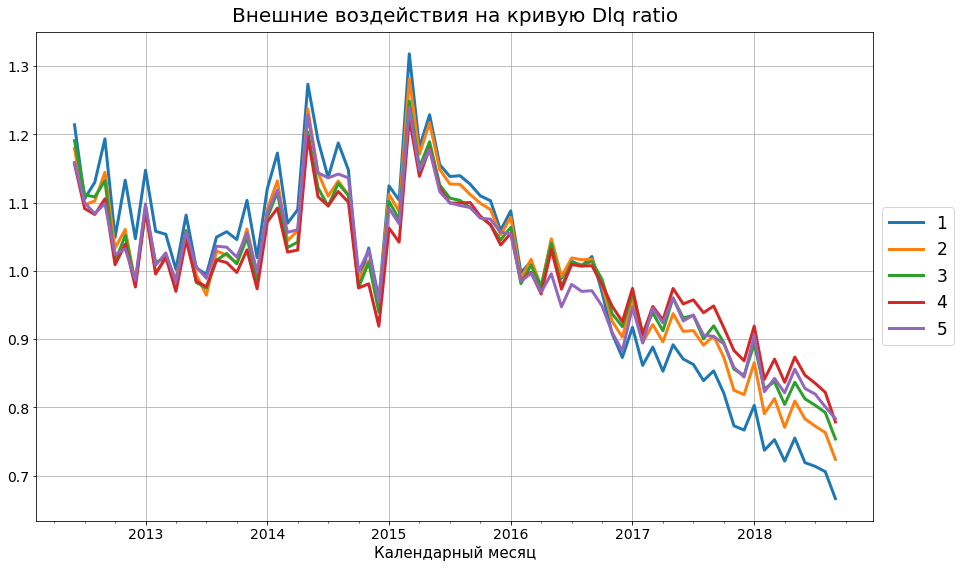

In [12]:
res_square['external_data'].query(''' month_dt >= '2012-06-01' ''')\
                    .set_index('month_dt')\
                    .plot(ax=None, figsize=(15, 9), grid=True, lw = 3)

plt.legend(loc='center left',bbox_to_anchor=(1, 0.5), fontsize = '17')
plt.title("Внешние воздействия на кривую Dlq ratio", size=20, verticalalignment='bottom')
plt.xlabel("Календарный месяц", size=15)
plt.tick_params(axis='both', which='major', labelsize=14)

### Кривая созревания выглядит следующим образом

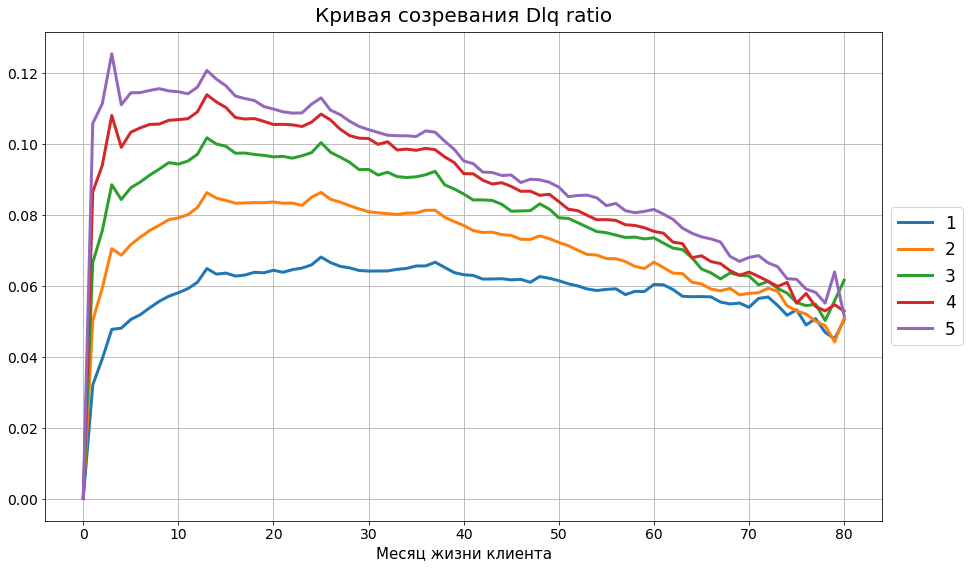

In [13]:
res_square['maturation_data'].drop('statement_num', 1).plot(ax=None, figsize=(15, 9), grid=True, lw = 3)

plt.legend(loc='center left',bbox_to_anchor=(1, 0.5), fontsize = '17')
plt.title("Кривая созревания Dlq ratio", size=20, verticalalignment='bottom')
plt.xlabel("Месяц жизни клиента", size=15)
plt.tick_params(axis='both', which='major', labelsize=14)

In [14]:
# Делаем список бакетов
buckets = df['pd_bucket'].drop_duplicates().sort_values(ascending = True)

def plot_dlq_ratio_by_statement_num(pd_bucket):
    
    # Выбираем один бакет 
    cur_df = df.query('pd_bucket == ' + str(pd_bucket))
    # Выбираем только поколения январей
    cur_df = cur_df.query('''generation_month in ('2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01', '2016-01-01','2017-01-01') ''')
    (cur_df.groupby(["generation_month",'pd_bucket', "statement_num"])
            .agg({"dlq_ratio":np.sum})
            .unstack('generation_month')
            ['dlq_ratio']
            .plot(ax=None, figsize=(15, 9), grid=True, lw = 3))
    plt.legend(loc='center left',bbox_to_anchor=(1, 0.5), fontsize = '17')
    plt.title("Кривая Dlq ratio", size=20, verticalalignment='bottom')
    plt.xlabel("Месяц жизни клиента", size=15)
    plt.tick_params(axis='both', which='major', labelsize=14)

# Отображаем его при помощи ipywidget, чтобы получить интерактивность
vintages_graph = interactive(plot_dlq_ratio_by_statement_num, pd_bucket = buckets)
vintages_graph

interactive(children=(Dropdown(description='pd_bucket', options=(1, 2, 3, 4, 5), value=1), Output()), _dom_cla…

In [15]:
# Делаем список бакетов
buckets = res_square['fitted_data']['pd_bucket'].drop_duplicates().sort_values(ascending = True)

def plot_dlq_ratio_by_statement_num(pd_bucket):
    
    # Выбираем один бакет 
    cur_df = res_square['fitted_data'].query('pd_bucket == ' + str(pd_bucket))
    # Выбираем только поколения январей
    cur_df = cur_df.query('''generation_month in ('2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01', '2016-01-01','2017-01-01') ''')
    (cur_df.groupby(["generation_month",'pd_bucket', "statement_num"])
            .agg({"fitted_feature":np.sum})
            .unstack('generation_month')
            ['fitted_feature']
            .plot(ax=None, figsize=(15, 9), grid=True, lw = 3))
    plt.legend(loc='center left',bbox_to_anchor=(1, 0.5), fontsize = '17')
    plt.title("Кривая Dlq ratio без внешних воздействий", size=20, verticalalignment='bottom')
    plt.xlabel("Месяц жизни клиента", size=15)
    plt.tick_params(axis='both', which='major', labelsize=14)

# Отображаем его при помощи ipywidget, чтобы получить интерактивность
vintages_graph = interactive(plot_dlq_ratio_by_statement_num, pd_bucket = buckets)
vintages_graph

interactive(children=(Dropdown(description='pd_bucket', options=(1, 2, 3, 4, 5), value=1), Output()), _dom_cla…

### Посмотрим по календарным месяцам без внешних воздействий 

In [16]:
def plot_dlq_ratio_by_month_dt(pd_bucket):
    
    #Список отдельных датафреймов по поколениям в бакете
    list_of_dataframes_generations = []
    
    # Your code goes here
    # Выбираем один бакет 
    cur_df = res_square['fitted_data'].query('pd_bucket == ' + str(pd_bucket))
    # Выбираем только поколения январей
    cur_df = cur_df.query('''generation_month in ('2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01') ''')
    
    generations_in_bucket = sorted(set(cur_df.generation_month))
    
    cur_df = (cur_df.groupby(["generation_month",'pd_bucket', "statement_num"])
            .agg({"fitted_feature":np.sum})
            .unstack('generation_month')
            ['fitted_feature'])
        
    for generation in generations_in_bucket:
        list_of_dataframes_generations.append(cur_df[generation].to_frame().reset_index(drop=True, inplace=False))
    
    for ind in range(len(list_of_dataframes_generations)):
        list_of_dataframes_generations[ind] = list_of_dataframes_generations[ind]. \
        assign(index = [change_month(i, dictionary_of_generations \
                                 [list_of_dataframes_generations[ind].columns[0]]) \
                        for i in range(len(list_of_dataframes_generations[ind]))])
        list_of_dataframes_generations[ind] = list_of_dataframes_generations[ind].set_index('index')
        
    final_data_for_bucket = list_of_dataframes_generations[0]
    for ind in range(1,len(list_of_dataframes_generations)):
        final_data_for_bucket[list_of_dataframes_generations[ind].columns[0]] = list_of_dataframes_generations[ind]
    
    final_data_for_bucket.plot(ax=None, figsize=(15, 9), grid=True, lw = 3)
    
    plt.legend(loc='center left',bbox_to_anchor=(1, 0.5), fontsize = '17')
    plt.title("Кривая Dlq ratio без внешних воздействий", size=20, verticalalignment='bottom')
    plt.xlabel("Календарный месяц", size=15)
    plt.tick_params(axis='both', which='major', labelsize=14)
    
# Отображаем его при помощи ipywidget, чтобы получить интерактивность
vintages_graph = interactive(plot_dlq_ratio_by_month_dt, pd_bucket = buckets)
vintages_graph

interactive(children=(Dropdown(description='pd_bucket', options=(1, 2, 3, 4, 5), value=1), Output()), _dom_cla…

### Выводы
- Из графиков следует, что винтажи без внешних воздействий стали более стабильными
- Кривые созревания по бакетам имеют одинаковые зависимости, растущие до определенного месяца, после чего начинающие спадать
- Также, как было указано, особенность в конце 2014 года связана с изменением стратегии взыскания
##### Внешние воздействия
- Внешние воздействия, можно сказать, не зависят от бакета и имеют схожие зависимости
- Внешние воздействия имеют максимум в середине 2014 года, что связано с кризисом перекредитования
- Внешние воздействия начинают спадать в конце 2014 года до начала финансового кризиса
- Внешние воздействия имеют резкий рост и максимум в начале 2015 года, что связано с финансовым кризисом
- После этих происшествий внешние воздействия идут на спад
##### Кривые созревания
- После выделения внешних воздействий кривые созревания для Delinquency ratio становятся более логичными, так как имеют максимум и рост в диапазоне 10-20 месяцев и затем идут на спад
- Также видим, что имеем небольшие максимумы (бугры) через каждые 12 месяцев на кривых созревания, что свзяано с тем,
- Что взимается ежегодная тарифная плата и люди могут вываливаться в просрочку

### Рассмотрим другие виды функционалов и исследуем зависимость от начального приближения
- Очевидно, что скорость сходимости и отчасти результат могут зависеть от начального приближения

##### Добавим два параметра в функцию: начальное приближение и вид функционала
##### Чтобы не копировать все заново

In [17]:
df_query = df.sort_values(['generation_month', 'statement_num']).reset_index()

gen_cnt = df_query['statement_num'].max()

x0 = np.array([1 for i in range(2*gen_cnt)]) 

def curve_build(x0, functional, data, 
                feature, 
                generation = 'generation_quart',
                statement_num = 'statement_num', 
                group_label = '1'):
    
    """Вспомогательная функция для построения разложения в рамках одного бакета
    
    **Аргументы**
    data : pandas.DataFrame
        таблица с данными
    feature: str
        название поля с исследуемой переменной
    generation : datetime
        название поля с поколениями
    where : str
        условие, которым мы ограничиваем выборку
    statement_num : int
        название поля с номером месяца жизни клиента
    group_label : str
        название поля группы
    **Результат**
    dictionary : dict
    """
    
    df_query = data.sort_values([generation, statement_num]).reset_index()

    # Рассчитываем количество поколений и тому подобное
    generation_min = df_query[generation].min()
    gen_cnt = df_query[statement_num].max()

    # Преобразуем Dataframe в набор векторов 
    values = np.array(df_query[feature])
    tab_size = df_query[feature].count()
    st_nums = np.array(df_query[statement_num] - 1)
    dates = np.array([0 for i in range(tab_size)])
    
    for i in range(tab_size):
         dates[i] = df_query.loc[i,generation].year * 12 + df_query.loc[i,generation].month -\
            generation_min.year * 12 - generation_min.month + df_query.loc[i,statement_num] - 1 

    # Определяем функционал, который будем минимизировать

    def r_square(x):
        temp = 0 
        for i in range(tab_size):
            if dates[i] >= 0:
                temp += (values[i] - x[dates[i]] * x[st_nums[i] + gen_cnt])**2
        return temp
    
    #Линейный функционал
    def linear(x):
        temp = 0 
        for i in range(tab_size):
            if dates[i] >= 0:
                temp += abs((values[i] - x[dates[i]] * x[st_nums[i] + gen_cnt]))
        return temp
    
    #Логарифмический функционал
    def log(x):
        temp = 0 
        for i in range(tab_size):
            if dates[i] >= 0:
                if values[i] - x[dates[i]] * x[st_nums[i] + gen_cnt] != 0:
                    temp += np.log(abs((values[i] - x[dates[i]] * x[st_nums[i] + gen_cnt])))
        return temp

    # Задаем callback для отслеживания прогресса минимизации
    def callbackF(Xi):
        global Nfeval
        if functional == 'r_square':
            print('%d  %.6f' % (Nfeval, r_square(Xi)))
        if functional == 'linear':
            print('%d  %.6f' % (Nfeval, linear(Xi)))
        if functional == 'log':
            print('%d  %.6f' % (Nfeval, log(Xi)))
        Nfeval += 1

    x0 = x0                               # Внешние воздействия

    # Численная минимизация

    print('Initial %.6f' % (r_square(x0)))
    if functional == 'r_square':
        res0 = minimize(r_square, x0, tol=1e-6, callback=callbackF, method='Powell', options = {'disp': False, 'maxiter': 1000})
    if functional == 'linear':
        res0 = minimize(linear, x0, tol=1e-6, callback=callbackF, method='Powell', options = {'disp': False, 'maxiter': 1000})
    if functional == 'log':
        res0 = minimize(log, x0, tol=1e-6, callback=callbackF, method='Powell', options = {'disp': False, 'maxiter': 1000})

    # Задаем датафрейм с внешними воздействиями
    external_data = pd.DataFrame({'month_dt': [generation_min + pd.DateOffset(months = i) for i in range(gen_cnt)], 
                             group_label: res0.x[:gen_cnt]})

    # Нормируем внешние воздействия таким образом, чтобы в среднем они равнялись единице. 
    ext_mean = external_data[external_data['month_dt'] > generation_min + pd.DateOffset(months = 6)][group_label].mean()
    external_data[group_label] = external_data[group_label] / ext_mean
    
    # И умножаем на полученный коэффициент кривые созревания
    
    maturation_array = np.transpose([res0.x[gen_cnt:2* gen_cnt] * ext_mean]).flatten()
    maturation_data = pd.DataFrame(data = {group_label: maturation_array, \
                                           'statement_num': np.arange(1,maturation_array.size + 1)})

    df_fitted = df_query.merge(right=external_data, on = 'month_dt')
    df_fitted['fitted_feature'] = df_fitted[feature] / df_fitted[group_label]

    # Формируем словарь c итоговыми данными
    res = {'res0': res0,
          'external_data': external_data,
          'maturation_data': maturation_data,
          'df_fitted': df_fitted}
    return res


def decomposition(functional, df, 
                  generation = 'generation_month', 
                  group = 'bucket', 
                  statement_num = 'statement_num', 
                  feature = 'feature', 
                  optimization_query = ''):
    """Винтажи исследуемой переменной по календарному времени
    
    **Аргументы**
    df : pandas.DataFrame
        таблица с данными
    generation : datetime
        название поля с поколениями
    group : str
        название поля с бакетами
    statement_num : int
        название поля с номером выписки
    feature: str
        название поля с исследуемой переменной
    optimization_query: str
        ограничение выборки для оптимизации
    **Результат**
    dictionary : dict
    """

    # Разбираемся со случаем пустых аргументов
 
    if optimization_query == '':
        df_query = pd.DataFrame(df)
    else:
        df_query = df.query(optimization_query)
    
    timedelta = df_query[statement_num].apply(lambda x: pd.DateOffset(months=x-1))
    df_query['month_dt'] = df_query[generation] + timedelta
    
      # Формируем список бакетов
    
    df_query.sort_values(by = [group], inplace = True)
    groups = pd.Series(df_query[group].drop_duplicates())
    
    # Запускаем цикл по бакетам
    i = 0
    for g in groups:
        df_temp = df_query[df_query[group] == g]
        print(group + ' = ' + str(g))
        
        # Строим разложение для одного бакета
        res = curve_build(x0, functional, df_temp, 
                          feature = feature, 
                          generation = generation, 
                          statement_num = statement_num, 
                          group_label = str(g)
                         )
        df_fitted_temp = pd.DataFrame(res['df_fitted'])
        df_fitted_temp[group] = g

        # Если первый шаг в цикле, то формируем датафреймы из результатов минимизации
        if i == 0:
            external_data = pd.DataFrame(res['external_data'])[['month_dt', str(g)]]
            maturation_data = pd.DataFrame(res['maturation_data'])[[statement_num, str(g)]]
            df_fitted = pd.DataFrame(df_fitted_temp)
        # Если шаг не первый, то дописываем столбцы в результаты
        else:
            external_data = external_data.merge(right = res['external_data'], on = ['month_dt'])
            maturation_data = maturation_data.merge(right = res['maturation_data'], on = [statement_num])
            df_fitted = pd.concat([df_fitted, df_fitted_temp]) 
        i+=1
        
    res_multiple = {
                    'external_data': external_data,
                    'maturation_data': maturation_data,
                    'fitted_data': df_fitted
                   }    
    return res_multiple

### Линейный функционал

In [18]:
x0 = np.array([0 for i in range(2*gen_cnt)])  

# Счетчик итераций
Nfeval = 0

# Проводим разложение кривых 
res = decomposition('linear', df, 
                       generation = 'generation_month', 
                       group = 'pd_bucket', 
                       statement_num = 'statement_num', 
                       feature = 'dlq_ratio')

/anaconda3/lib/python3.6/site-packages/pandas/core/indexes/datetimelike.py:809: PerformanceWarning: Adding/subtracting array of DateOffsets to DatetimeIndex not vectorized
  .format(cls=type(self).__name__), PerformanceWarning)


pd_bucket = 1
Initial 10.608510
0  23.924849
1  9.893360
2  9.086335
3  9.003972
4  8.990244
5  8.987369
6  8.986224
7  8.986213
8  8.986213
pd_bucket = 2
Initial 17.885948
9  24.984967
10  10.893561
11  10.607862
12  10.577916
13  10.573831
14  10.572220
15  10.572012
16  10.572012
pd_bucket = 3
Initial 24.235559


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:185: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



17  26.104981
18  13.597207
19  13.283866
20  13.249251
21  13.238639
22  13.236896
23  13.236720
24  13.236720
pd_bucket = 4
Initial 26.792803
25  23.548808
26  13.820175
27  13.555226
28  13.528590
29  13.522849
30  13.521788
31  13.521541
32  13.521490
33  13.520260
34  13.520096
35  13.520044
36  13.519748
37  13.519747
pd_bucket = 5
Initial 26.964591
38  27.156196
39  18.649397
40  18.201537
41  18.105236
42  18.081727
43  18.078571
44  18.077618
45  18.077071
46  18.077071


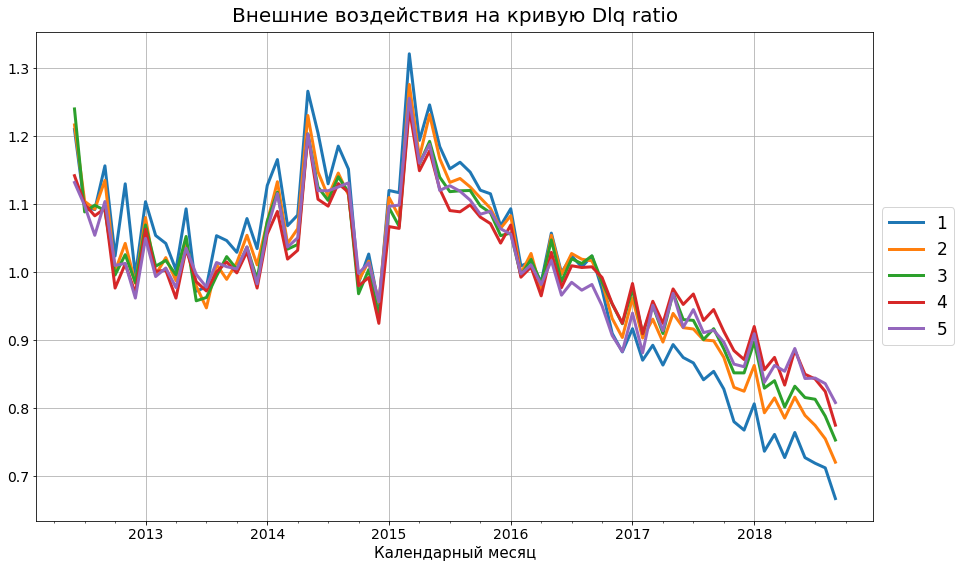

In [19]:
res['external_data'].query(''' month_dt >= '2012-06-01' ''')\
                    .set_index('month_dt')\
                    .plot(ax=None, figsize=(15, 9), grid=True, lw = 3)

plt.legend(loc='center left',bbox_to_anchor=(1, 0.5), fontsize = '17')
plt.title("Внешние воздействия на кривую Dlq ratio", size=20, verticalalignment='bottom')
plt.xlabel("Календарный месяц", size=15)
plt.tick_params(axis='both', which='major', labelsize=14)

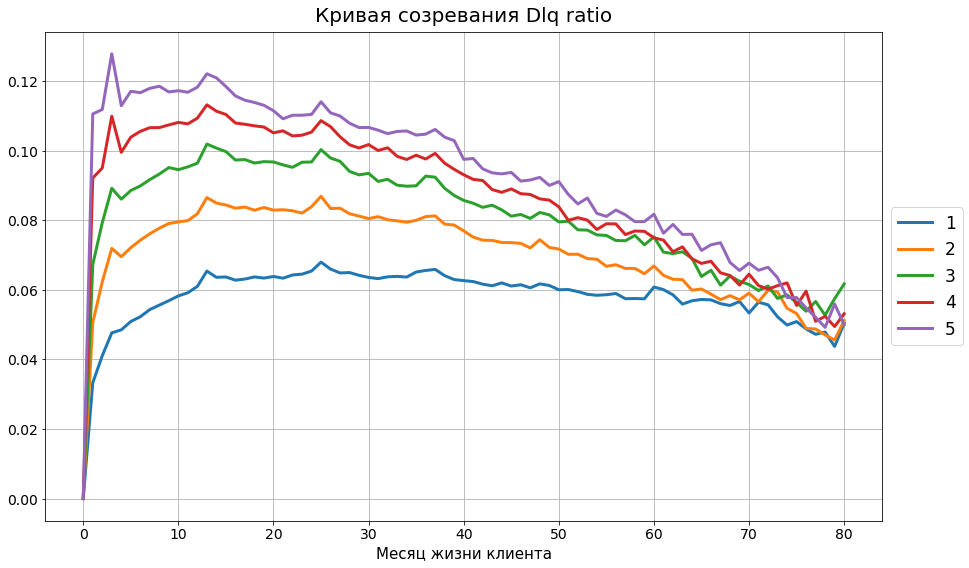

In [20]:
res['maturation_data'].drop('statement_num', 1).plot(ax=None, figsize=(15, 9), grid=True, lw = 3)

plt.legend(loc='center left',bbox_to_anchor=(1, 0.5), fontsize = '17')
plt.title("Кривая созревания Dlq ratio", size=20, verticalalignment='bottom')
plt.xlabel("Месяц жизни клиента", size=15)
plt.tick_params(axis='both', which='major', labelsize=14)

In [21]:
# Делаем список бакетов
buckets = res['fitted_data']['pd_bucket'].drop_duplicates().sort_values(ascending = True)

def plot_dlq_ratio_by_statement_num(pd_bucket):
    
    # Выбираем один бакет 
    cur_df = res['fitted_data'].query('pd_bucket == ' + str(pd_bucket))
    # Выбираем только поколения январей
    cur_df = cur_df.query('''generation_month in ('2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01', '2016-01-01','2017-01-01') ''')
    (cur_df.groupby(["generation_month",'pd_bucket', "statement_num"])
            .agg({"fitted_feature":np.sum})
            .unstack('generation_month')
            ['fitted_feature']
            .plot(ax=None, figsize=(15, 9), grid=True, lw = 3))
    plt.legend(loc='center left',bbox_to_anchor=(1, 0.5), fontsize = '17')
    plt.title("Кривая Dlq ratio без внешних воздействий", size=20, verticalalignment='bottom')
    plt.xlabel("Месяц жизни клиента", size=15)
    plt.tick_params(axis='both', which='major', labelsize=14)

# Отображаем его при помощи ipywidget, чтобы получить интерактивность
vintages_graph = interactive(plot_dlq_ratio_by_statement_num, pd_bucket = buckets)
vintages_graph

interactive(children=(Dropdown(description='pd_bucket', options=(1, 2, 3, 4, 5), value=1), Output()), _dom_cla…

### Логарифмический функционал

In [22]:
x0 = np.array([0 for i in range(2*gen_cnt)])  

# Счетчик итераций
Nfeval = 0

# Проводим разложение кривых 
res = decomposition('log', df, 
                       generation = 'generation_month', 
                       group = 'pd_bucket', 
                       statement_num = 'statement_num', 
                       feature = 'dlq_ratio')

/anaconda3/lib/python3.6/site-packages/pandas/core/indexes/datetimelike.py:809: PerformanceWarning: Adding/subtracting array of DateOffsets to DatetimeIndex not vectorized
  .format(cls=type(self).__name__), PerformanceWarning)


pd_bucket = 1
Initial 10.608510
0  -18984.247692
1  -22080.795410
2  -23175.355423
3  -23465.574145
4  -23506.279850
5  -23510.122166
6  -23510.122166
pd_bucket = 2
Initial 17.885948
7  -18976.238163
8  -21911.129250
9  -22827.670309
10  -23069.166009
11  -23074.085506
12  -23075.971145
13  -23075.971145
pd_bucket = 3
Initial 24.235559


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:185: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



14  -18890.821217
15  -21563.022038
16  -22464.509423
17  -22706.075534
18  -22729.766413
19  -22729.766413
pd_bucket = 4
Initial 26.792803
20  -17015.922963
21  -19119.367947
22  -19889.682512
23  -20045.884194
24  -20058.298890
25  -20058.298890
pd_bucket = 5
Initial 26.964591
26  -14718.077829
27  -16691.460210
28  -17438.439648
29  -17614.847444
30  -17624.942696
31  -17624.942696


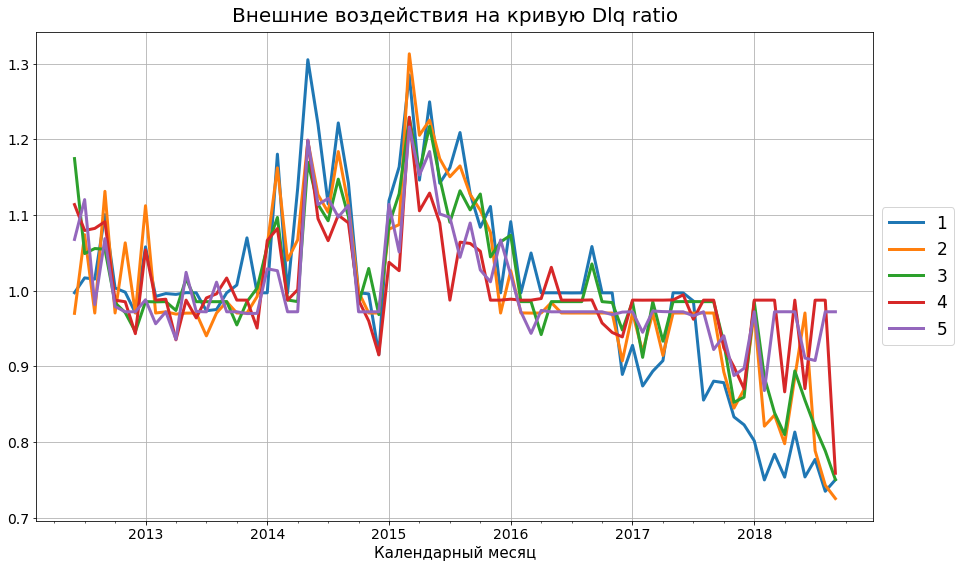

In [23]:
res['external_data'].query(''' month_dt >= '2012-06-01' ''')\
                    .set_index('month_dt')\
                    .plot(ax=None, figsize=(15, 9), grid=True, lw = 3)

plt.legend(loc='center left',bbox_to_anchor=(1, 0.5), fontsize = '17')
plt.title("Внешние воздействия на кривую Dlq ratio", size=20, verticalalignment='bottom')
plt.xlabel("Календарный месяц", size=15)
plt.tick_params(axis='both', which='major', labelsize=14)

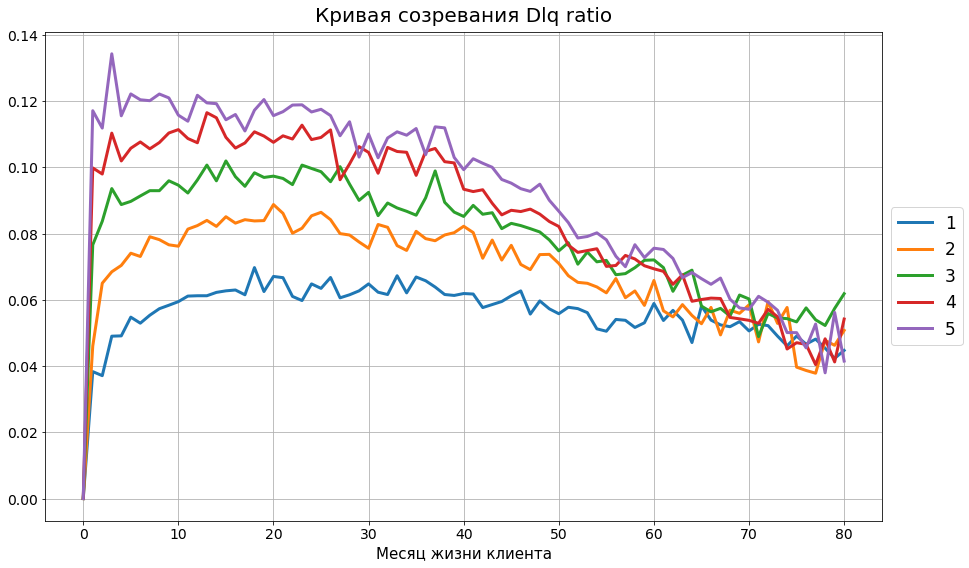

In [24]:
res['maturation_data'].drop('statement_num', 1).plot(ax=None, figsize=(15, 9), grid=True, lw = 3)

plt.legend(loc='center left',bbox_to_anchor=(1, 0.5), fontsize = '17')
plt.title("Кривая созревания Dlq ratio", size=20, verticalalignment='bottom')
plt.xlabel("Месяц жизни клиента", size=15)
plt.tick_params(axis='both', which='major', labelsize=14)

In [25]:
# Делаем список бакетов
buckets = res['fitted_data']['pd_bucket'].drop_duplicates().sort_values(ascending = True)

def plot_dlq_ratio_by_statement_num(pd_bucket):
    
    # Выбираем один бакет 
    cur_df = res['fitted_data'].query('pd_bucket == ' + str(pd_bucket))
    # Выбираем только поколения январей
    cur_df = cur_df.query('''generation_month in ('2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01', '2016-01-01','2017-01-01') ''')
    (cur_df.groupby(["generation_month",'pd_bucket', "statement_num"])
            .agg({"fitted_feature":np.sum})
            .unstack('generation_month')
            ['fitted_feature']
            .plot(ax=None, figsize=(15, 9), grid=True, lw = 3))
    plt.legend(loc='center left',bbox_to_anchor=(1, 0.5), fontsize = '17')
    plt.title("Кривая Dlq ratio без внешних воздействий", size=20, verticalalignment='bottom')
    plt.xlabel("Месяц жизни клиента", size=15)
    plt.tick_params(axis='both', which='major', labelsize=14)

# Отображаем его при помощи ipywidget, чтобы получить интерактивность
vintages_graph = interactive(plot_dlq_ratio_by_statement_num, pd_bucket = buckets)
vintages_graph

interactive(children=(Dropdown(description='pd_bucket', options=(1, 2, 3, 4, 5), value=1), Output()), _dom_cla…

### Выводы по функционалам
- Как известно, для минимизации линейного функционала прибегают к методам условной оптимизации во многих примерах
- В данном случае имеем более качественное разделение через квадратичный функционал
- Логарифмичекий функционал дольше минимизируется по времени и имеет менее качественные результаты

### Зависимость от начальных условий
- Рассмотрим на примере квадратичного функционала и посмотрим на несколько случаев:
- нули
- единицы
- десятки
- отрицательные единицы
- отрицательные десятки
- от нуля до единицы
- отрицательные от нуля до единицы

In [26]:
x0 = np.array([1 for i in range(2*gen_cnt)])  

# Счетчик итераций
Nfeval = 0

# Проводим разложение кривых 
res = decomposition('r_square', df, 
                       generation = 'generation_month', 
                       group = 'pd_bucket', 
                       statement_num = 'statement_num', 
                       feature = 'dlq_ratio')

/anaconda3/lib/python3.6/site-packages/pandas/core/indexes/datetimelike.py:809: PerformanceWarning: Adding/subtracting array of DateOffsets to DatetimeIndex not vectorized
  .format(cls=type(self).__name__), PerformanceWarning)


pd_bucket = 1
Initial 2883.223039
0  0.069319
1  0.044931
2  0.044158
3  0.044100
4  0.044096
5  0.044095
6  0.044095
pd_bucket = 2
Initial 2781.277842
7  0.088892
8  0.063506
9  0.063359
10  0.063358
11  0.063357
12  0.063357
pd_bucket = 3
Initial 2711.624791


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:185: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



13  0.134419
14  0.097567
15  0.097213
16  0.097202
17  0.097201
18  0.097201
pd_bucket = 4
Initial 2392.426445
19  0.191812
20  0.115177
21  0.112489
22  0.112355
23  0.112347
24  0.112346
25  0.112346
26  0.112346
pd_bucket = 5
Initial 2106.333077
27  0.393431
28  0.303664
29  0.297004
30  0.296468
31  0.296422
32  0.296418
33  0.296417
34  0.296417


In [27]:
x0 = np.array([90 for i in range(2*gen_cnt)])  

# Счетчик итераций
Nfeval = 0

# Проводим разложение кривых 
res = decomposition('r_square', df, 
                       generation = 'generation_month', 
                       group = 'pd_bucket', 
                       statement_num = 'statement_num', 
                       feature = 'dlq_ratio')

/anaconda3/lib/python3.6/site-packages/pandas/core/indexes/datetimelike.py:809: PerformanceWarning: Adding/subtracting array of DateOffsets to DatetimeIndex not vectorized
  .format(cls=type(self).__name__), PerformanceWarning)


pd_bucket = 1
Initial 211983007088.299225
0  0.069253
1  0.044854
2  0.044080
3  0.044023
4  0.044018
5  0.044018
6  0.044018
pd_bucket = 2
Initial 211916520492.226868
7  0.088892
8  0.063506
9  0.063359
10  0.063358
11  0.063357
12  0.063357
pd_bucket = 3
Initial 211981506777.011810


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:185: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



13  0.134043
14  0.097168
15  0.096814
16  0.096802
17  0.096802
18  0.096802
pd_bucket = 4
Initial 190723884959.297211
19  0.191090
20  0.114438
21  0.111752
22  0.111618
23  0.111609
24  0.111609
25  0.111609
pd_bucket = 5
Initial 169794560111.701630
26  0.392332
27  0.302565
28  0.295906
29  0.295371
30  0.295325
31  0.295321
32  0.295321
33  0.295321


In [28]:
x0 = np.array([-90 for i in range(2*gen_cnt)])  

# Счетчик итераций
Nfeval = 0

# Проводим разложение кривых 
res = decomposition('r_square', df, 
                       generation = 'generation_month', 
                       group = 'pd_bucket', 
                       statement_num = 'statement_num', 
                       feature = 'dlq_ratio')

/anaconda3/lib/python3.6/site-packages/pandas/core/indexes/datetimelike.py:809: PerformanceWarning: Adding/subtracting array of DateOffsets to DatetimeIndex not vectorized
  .format(cls=type(self).__name__), PerformanceWarning)


pd_bucket = 1
Initial 211983007088.299225
0  0.069254
1  0.044854
2  0.044080
3  0.044023
4  0.044018
5  0.044018
6  0.044018
pd_bucket = 2
Initial 211916520492.226868
7  0.088890
8  0.063506
9  0.063359
10  0.063358
11  0.063357
12  0.063357
pd_bucket = 3
Initial 211981506777.011810


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:185: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



13  0.134042
14  0.097168
15  0.096814
16  0.096802
17  0.096802
18  0.096802
pd_bucket = 4
Initial 190723884959.297211
19  0.191090
20  0.114438
21  0.111752
22  0.111618
23  0.111609
24  0.111609
25  0.111609
pd_bucket = 5
Initial 169794560111.701630
26  0.392334
27  0.302565
28  0.295906
29  0.295371
30  0.295325
31  0.295321
32  0.295321
33  0.295321


### Выводы по начальным условиям
- Как известно, в методах оптимизации начальные условия не предполагаются заданными заранее
- Поэтому, как видим, результат сходится примерно к одинаковым значениям

### Построим графики для одного нового выбора начальных условий

In [29]:
x0 = np.array([-50 for i in range(2*gen_cnt)])  

# Счетчик итераций
Nfeval = 0

# Проводим разложение кривых 
res = decomposition('r_square', df, 
                       generation = 'generation_month', 
                       group = 'pd_bucket', 
                       statement_num = 'statement_num', 
                       feature = 'dlq_ratio')

/anaconda3/lib/python3.6/site-packages/pandas/core/indexes/datetimelike.py:809: PerformanceWarning: Adding/subtracting array of DateOffsets to DatetimeIndex not vectorized
  .format(cls=type(self).__name__), PerformanceWarning)


pd_bucket = 1
Initial 20192854046.932724
0  0.069254
1  0.044854
2  0.044080
3  0.044023
4  0.044018
5  0.044018
6  0.044018
pd_bucket = 2
Initial 20186333497.620773
7  0.088892
8  0.063506
9  0.063359
10  0.063358
11  0.063357
12  0.063357
pd_bucket = 3
Initial 20192390997.314705


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:185: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



13  0.134043
14  0.097168
15  0.096814
16  0.096802
17  0.096802
18  0.096802
pd_bucket = 4
Initial 18167396610.899113
19  0.191090
20  0.114438
21  0.111752
22  0.111618
23  0.111609
24  0.111609
25  0.111609
pd_bucket = 5
Initial 16173728448.179787
26  0.392333
27  0.302565
28  0.295906
29  0.295371
30  0.295325
31  0.295321
32  0.295321
33  0.295321


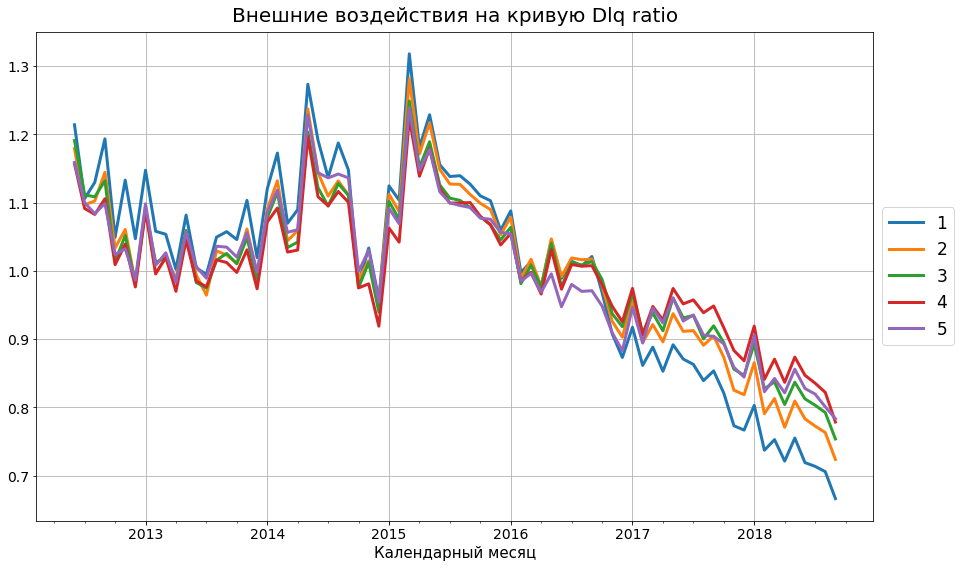

In [30]:
res['external_data'].query(''' month_dt >= '2012-06-01' ''')\
                    .set_index('month_dt')\
                    .plot(ax=None, figsize=(15, 9), grid=True, lw = 3)

plt.legend(loc='center left',bbox_to_anchor=(1, 0.5), fontsize = '17')
plt.title("Внешние воздействия на кривую Dlq ratio", size=20, verticalalignment='bottom')
plt.xlabel("Календарный месяц", size=15)
plt.tick_params(axis='both', which='major', labelsize=14)

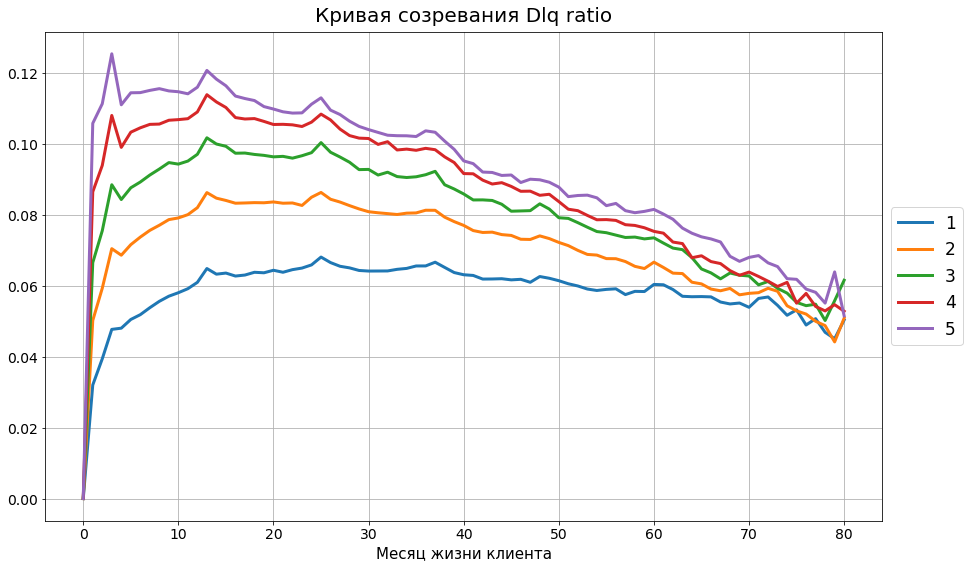

In [31]:
res['maturation_data'].drop('statement_num', 1).plot(ax=None, figsize=(15, 9), grid=True, lw = 3)

plt.legend(loc='center left',bbox_to_anchor=(1, 0.5), fontsize = '17')
plt.title("Кривая созревания Dlq ratio", size=20, verticalalignment='bottom')
plt.xlabel("Месяц жизни клиента", size=15)
plt.tick_params(axis='both', which='major', labelsize=14)

#### Задание 3
* Сгладить полученные кривые созревания, продолжить прогноз до 100-ого месяца
(***3 балла***)

### Вспомним наши кривые созревания для квадратичного функционала
- С нулевыми начальными условиями

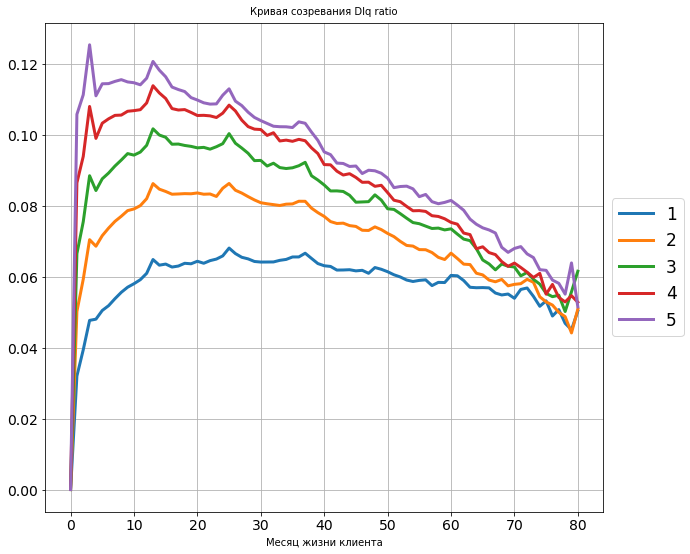

In [32]:
res_square['maturation_data'].drop('statement_num', 1).plot(ax=None, figsize=(10, 9), grid=True, lw = 3)

plt.legend(loc='center left',bbox_to_anchor=(1, 0.5), fontsize = '17')
plt.title("Кривая созревания Dlq ratio", size=10, verticalalignment='bottom')
plt.xlabel("Месяц жизни клиента", size=10)
plt.tick_params(axis='both', which='major', labelsize=14)

In [33]:
res_square['maturation_data'].head()

,statement_num,1,2,3,4,5
0,1,0.000002,-2.128890e-10,0.000005,0.000011,0.000018
1,2,0.032022,5.021253e-02,0.066522,0.086493,0.105804
2,3,0.039408,5.930446e-02,0.075516,0.093932,0.111320
3,4,0.047705,7.046122e-02,0.088495,0.108027,0.125413
4,5,0.048044,6.862085e-02,0.084320,0.099024,0.111033


### Линейное

In [34]:
def linear_approximation(df, bucket, start=1, finish=100):
    df_res = pd.DataFrame(df)
    df_res['Линейная функция'] = df [bucket]                                               # Копируем средние значения
    linear_coeff = np.polyfit(np.arange(start, finish+1),df.loc[start:finish, bucket], 1)  # Коэффициенты уравнения прямой
    linear_coeff = np.poly1d(linear_coeff)                                                    # Превращаем коэффициенты в функцию
    df_res.loc[start:finish, 'Линейная функция'] = linear_coeff(np.arange(start, finish+1))   # Записываем приближение
    df_res.loc[finish+1:, 'Линейная функция'] = linear_coeff(finish+1)                        # Продолжаем кривую константой
    return df_res

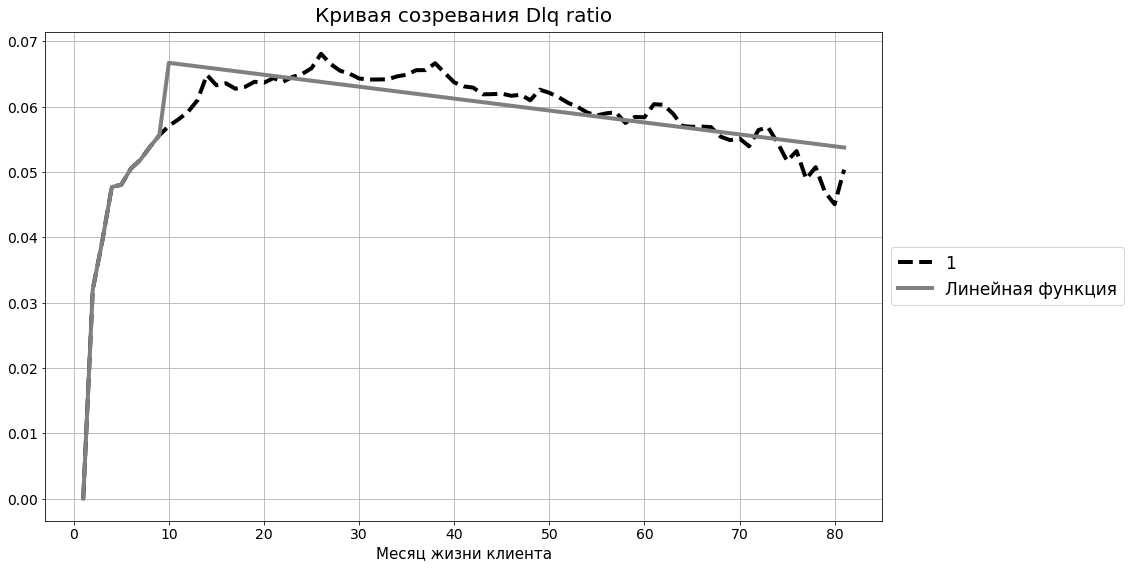

In [35]:
# # Делаем аппроксимацию
bucket = '1'
df_linear = res_square['maturation_data'][['statement_num', bucket]].set_index(['statement_num'])
df_linear = linear_approximation(df_linear, bucket, 10, 81)

# Строим получившийся график

plt.figure(figsize=(15, 9))
df_linear[bucket].plot(grid=True, color = 'Black', linestyle = '--', lw = 4)
df_linear['Линейная функция'].plot(grid=True, color = 'Gray', linestyle = '-', lw = 4)

plt.legend(loc='center left',bbox_to_anchor=(1, 0.5), fontsize = '17')
plt.title("Кривая созревания Dlq ratio", size=20, verticalalignment='bottom')
plt.xlabel("Месяц жизни клиента", size=15)
plt.tick_params(axis='both', which='major', labelsize=14)

### Полином

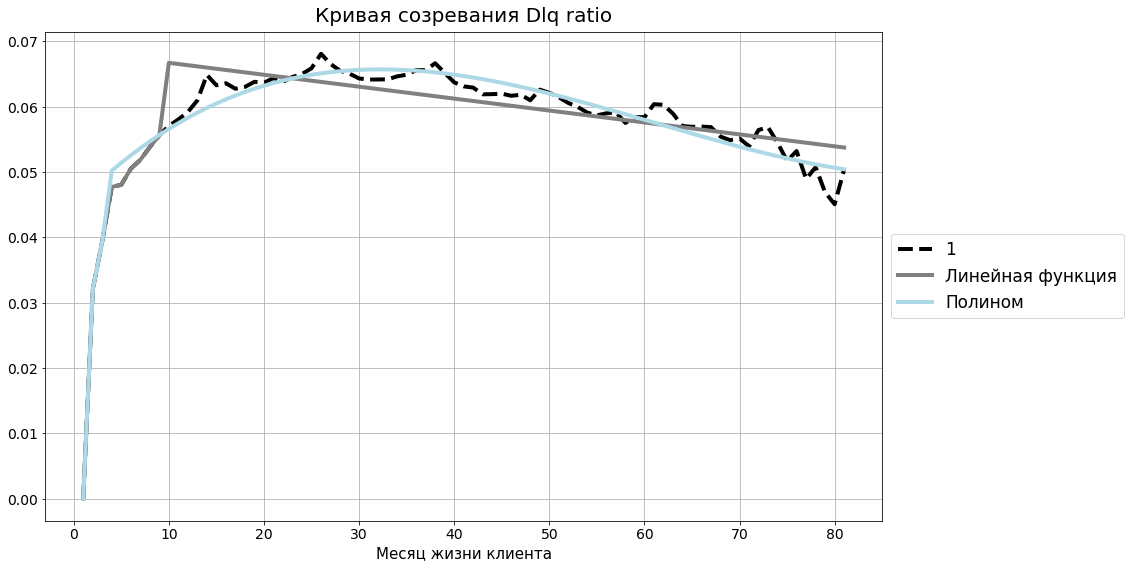

In [36]:
bucket = '1'
def polynom_approximation(df, bucket, start=1, finish=20, degree = 1):
    df_res = pd.DataFrame(df)
    df_res['Полином'] = df[bucket]                   
    linear_coeff = np.polyfit(np.arange(start, finish+1),df.loc[start:finish, bucket], degree)  # Здесь произвольная степень
    linear_coeff = np.poly1d(linear_coeff)                                                 
    df_res.loc[start:finish, 'Полином'] = linear_coeff(np.arange(start, finish+1)) 
    df_res.loc[finish+1:, 'Полином'] = linear_coeff(finish+1)                    
    return df_res

df_linear = res_square['maturation_data'][['statement_num', bucket]].set_index(['statement_num'])
df_linear = linear_approximation(df_linear, bucket, 10, 81)

# Делаем полиномиальную аппроксимацию
df_polynom = polynom_approximation(df_linear, bucket, 4,81,3)

# Строим получившиеся графики вместе
plt.figure(figsize=(15, 9))
df_polynom[bucket].plot(grid=True, color = 'Black', linestyle = '--', lw = 4)
df_polynom['Линейная функция'].plot(grid=True, color = 'Gray', linestyle = '-', lw = 4)
df_polynom['Полином'].plot(grid=True, color = 'LightBlue', linestyle = '-', lw = 4)

plt.legend(loc='center left',bbox_to_anchor=(1, 0.5), fontsize = '17')
plt.title("Кривая созревания Dlq ratio", size=20, verticalalignment='bottom')
plt.xlabel("Месяц жизни клиента", size=15)
plt.tick_params(axis='both', which='major', labelsize=14)

### Скользящее среднее

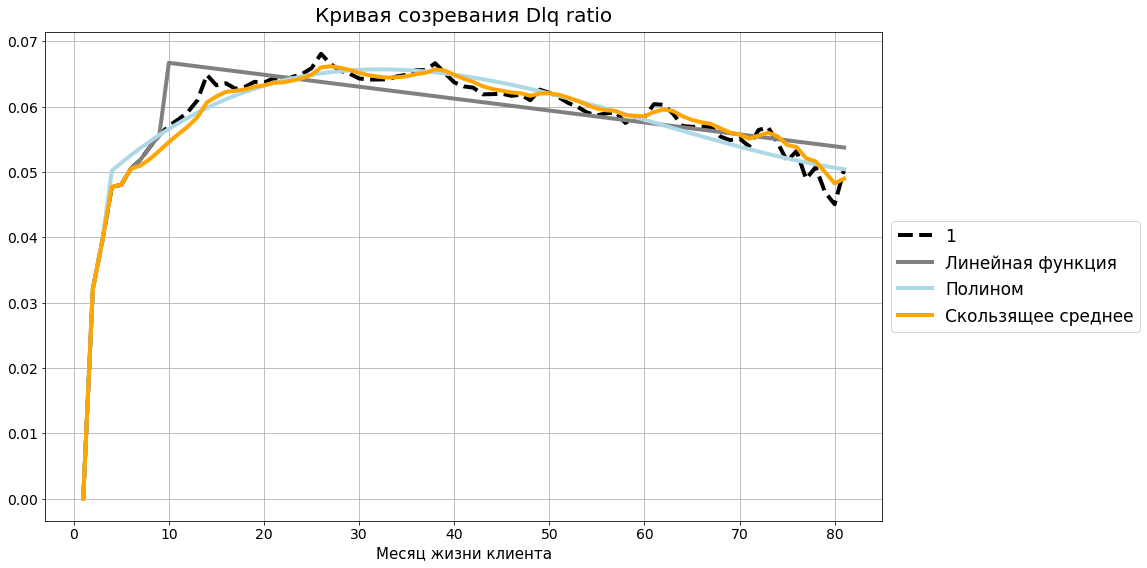

In [37]:
bucket = '1'
def exponential_smoothing(df, bucket, start, finish, alpha):
    df_res = pd.DataFrame(df)
    result = [df_res.loc[i,bucket] for i in np.arange(1,start+1)]                              # Начальные значения копируем
    for n in range(start, len(df_res[bucket])): 
        result.append(float(alpha * df_res.loc[n + 1, bucket] + (1 - alpha) * result[n-1]))    # Делаем сглаживание
    df_res['Скользящее среднее'] = result
    return df_res

df_linear = res_square['maturation_data'][['statement_num', bucket]].set_index(['statement_num'])
df_linear = linear_approximation(df_linear, bucket, 10, 81)

# Делаем полиномиальную аппроксимацию
df_polynom = polynom_approximation(df_linear, bucket, 4,81,3)

# Строим экспоненциальное скользящее среднее с alpha = 0.35
df_smooth = exponential_smoothing(df_polynom, bucket, 6,21, 0.35)

# Строим получившиеся графики
plt.figure(figsize=(15, 9))
df_smooth[bucket].plot(grid=True, color = 'Black', linestyle = '--', lw = 4)
df_smooth['Линейная функция'].plot(grid=True, color = 'Gray', linestyle = '-', lw = 4)
df_smooth['Полином'].plot(grid=True, color = 'LightBlue', linestyle = '-', lw = 4)
df_smooth['Скользящее среднее'].plot(grid=True, color = 'Orange', linestyle = '-', lw = 4)

plt.legend(loc='center left',bbox_to_anchor=(1, 0.5), fontsize = '17')
plt.title("Кривая созревания Dlq ratio", size=20, verticalalignment='bottom')
plt.xlabel("Месяц жизни клиента", size=15)
plt.tick_params(axis='both', which='major', labelsize=14)

### Скользящее среднее и полином описывают кривую наилучшим образом
- Подберем параметры и выведем все кривые по бакетам на одном графике
- Рассматриваем скользящее среднее с параметром 0.35

### Строим итоговый прогноз

In [38]:
def my_approximation(df, start=1, finish=100):
    pass
    #Это скользящее среднее или полином, выше его задаю
    #Так что my_approximation это exponential_smoothing

df_smooth_result = pd.DataFrame()
for bucket in ['1', '2', '3', '4', '5']:
    
    df_linear = res_square['maturation_data'][['statement_num', bucket]].set_index(['statement_num'])
    df_linear = linear_approximation(df_linear, bucket, 10, 20)

    # Делаем полиномиальную аппроксимацию
    df_polynom = polynom_approximation(df_linear, bucket, 4,20,3)

    # Строим экспоненциальное скользящее среднее с alpha = 0.35
    df_smooth_result[int(bucket)] = exponential_smoothing(df_polynom, bucket, 6,21, 0.35)['Скользящее среднее']

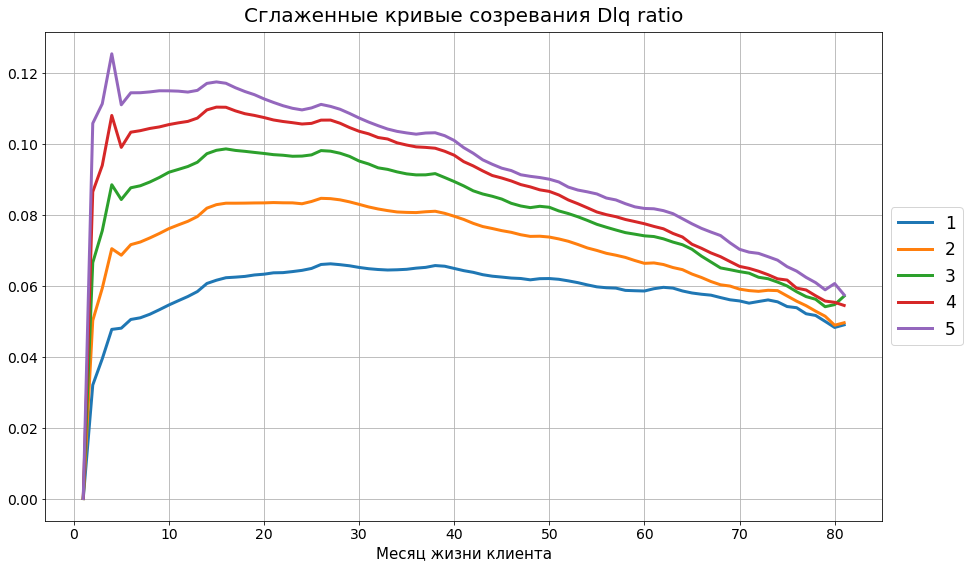

In [39]:
# Строим итоговый график
df_smooth_result.plot(figsize=(15, 9), grid=True, lw = 3)
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5), fontsize = '17')
plt.title("Сглаженные кривые созревания Dlq ratio", size=20, verticalalignment='bottom')
plt.xlabel("Месяц жизни клиента", size=15)
plt.tick_params(axis='both', which='major', labelsize=14)

In [40]:
def my_approximation(df, start=1, finish=100):
    pass
    #Это скользящее среднее или полином, выше его задаю
    #Так что my_approximation это exponential_smoothing

df_polynom_result = pd.DataFrame()
for bucket in ['1', '2', '3', '4', '5']:
    
    df_linear = res_square['maturation_data'][['statement_num', bucket]].set_index(['statement_num'])
    df_linear = linear_approximation(df_linear, bucket, 10, 81)

    # Делаем полиномиальную аппроксимацию
    df_polynom = polynom_approximation(df_linear, bucket, 4,81,5)

    df_polynom_result[int(bucket)] = df_polynom['Полином']

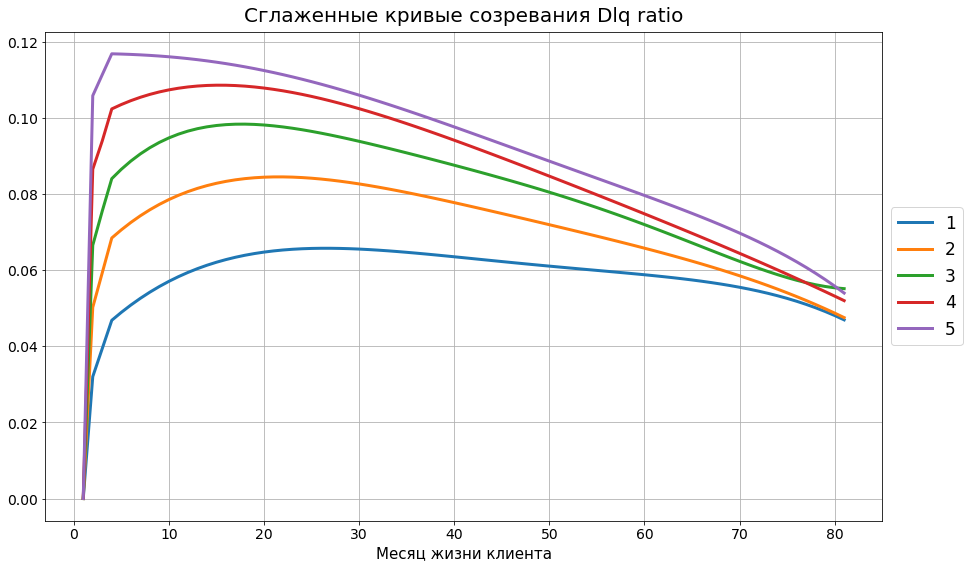

In [41]:
# Строим итоговый график
df_polynom_result.plot(figsize=(15, 9), grid=True, lw = 3)
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5), fontsize = '17')
plt.title("Сглаженные кривые созревания Dlq ratio", size=20, verticalalignment='bottom')
plt.xlabel("Месяц жизни клиента", size=15)
plt.tick_params(axis='both', which='major', labelsize=14)

### Продолжим прогноз до 100-ого месяца 

In [42]:
def polynom_approximation(df, bucket, start=1, finish=20, degree = 1):
    df_res = pd.DataFrame(df)
    df_res['Полином'] = df[bucket]                   
    linear_coeff = np.polyfit(np.arange(start, finish+1),df.loc[start:finish, bucket], degree)  # Здесь произвольная степень
    linear_coeff = np.poly1d(linear_coeff)                                                 
    df_res.loc[start:finish, 'Полином'] = linear_coeff(np.arange(start, finish+1)) 
    for i in range(0,20):
        df_res.loc[finish+1+i:, 'Полином'] = linear_coeff(finish+1+i)                    
    return df_res

def my_approximation(df, start=1, finish=100):
    pass
    #Это скользящее среднее или полином, выше его задаю
    #Так что my_approximation это exponential_smoothing

df_polynom_result_1 = pd.DataFrame()
for bucket in ['1', '2', '3', '4', '5']:
    
    df_linear = res_square['maturation_data'][['statement_num', bucket]].set_index(['statement_num'])

    df_test = pd.DataFrame()
    df_test['statement_num'] = [i for i in range(82,101)]
    df_test['pd_bucket'] = [0 for i in range(19)]
    df_test['Среднее'] = [0 for i in range(19)]
    df_test = df_test.set_index('statement_num')
    df_test = df_linear.append(df_test)
    
    df_linear = linear_approximation(df_test, bucket, 10, 81)

    # Делаем полиномиальную аппроксимацию
    df_polynom = polynom_approximation(df_test, bucket, 4,81,2)

    # Строим экспоненциальное скользящее среднее с alpha = 0.35
    df_polynom_result_1[int(bucket)] = df_polynom['Полином']

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


### 1 вид прогноза

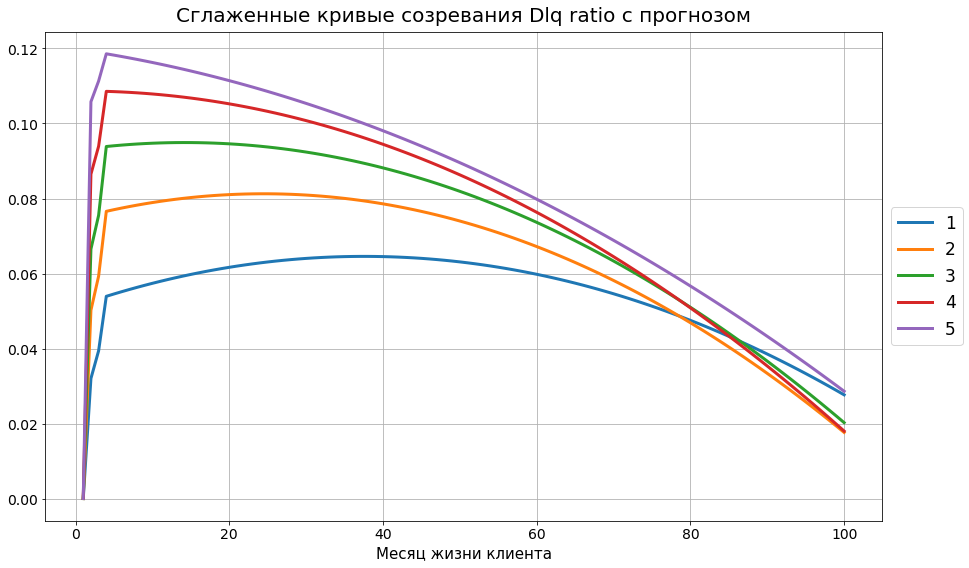

In [43]:
# Строим итоговый график
df_polynom_result_1.plot(figsize=(15, 9), grid=True, lw = 3)
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5), fontsize = '17')
plt.title("Сглаженные кривые созревания Dlq ratio с прогнозом", size=20, verticalalignment='bottom')
plt.xlabel("Месяц жизни клиента", size=15)
plt.tick_params(axis='both', which='major', labelsize=14)

In [44]:
def polynom_approximation(df, bucket, start=1, finish=20, degree = 1):
    df_res = pd.DataFrame(df)
    df_res['Полином'] = df[bucket]                   
    linear_coeff = np.polyfit(np.arange(start, finish+1),df.loc[start:finish, bucket], degree)  # Здесь произвольная степень
    linear_coeff = np.poly1d(linear_coeff)                                                 
    df_res.loc[start:finish, 'Полином'] = linear_coeff(np.arange(start, finish+1)) 
    for i in range(0,20):
        df_res.loc[finish+1+i:, 'Полином'] = linear_coeff(finish+1+i)                    
    return df_res

def my_approximation(df, start=1, finish=100):
    pass
    #Это скользящее среднее или полином, выше его задаю
    #Так что my_approximation это exponential_smoothing

df_polynom_result = pd.DataFrame()
for bucket in ['1', '2', '3', '4', '5']:
    
    df_linear = res_square['maturation_data'][['statement_num', bucket]].set_index(['statement_num'])

    df_test = pd.DataFrame()
    df_test['statement_num'] = [i for i in range(82,101)]
    df_test['pd_bucket'] = [0 for i in range(19)]
    df_test['Среднее'] = [0 for i in range(19)]
    df_test = df_test.set_index('statement_num')
    df_test = df_linear.append(df_test)
    
    df_linear = linear_approximation(df_test, bucket, 10, 81)

    # Делаем полиномиальную аппроксимацию
    df_polynom = polynom_approximation(df_test, bucket, 10,81,3)

    # Строим экспоненциальное скользящее среднее с alpha = 0.35
    df_polynom_result[int(bucket)] = df_polynom['Полином']

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


### 2 вид прогноза

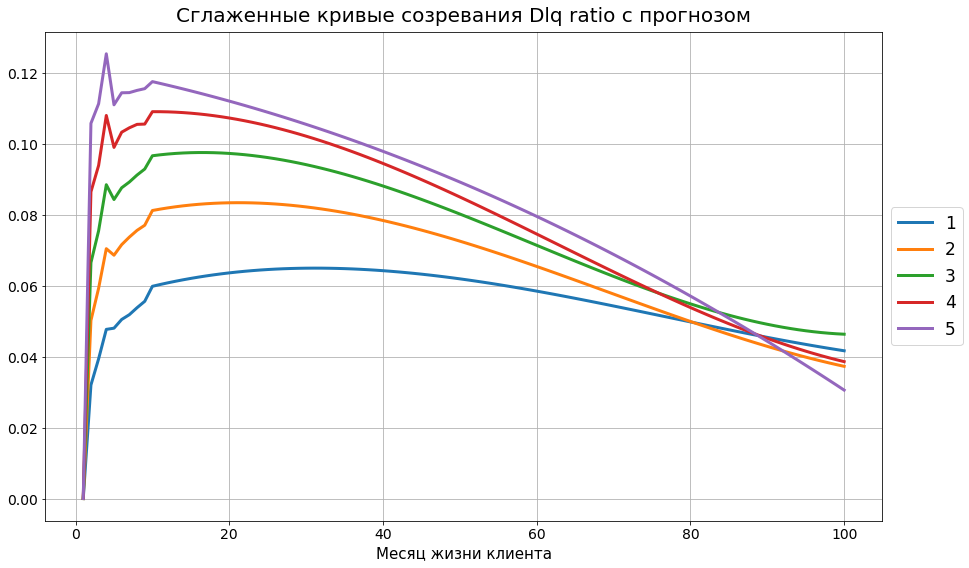

In [45]:
# Строим итоговый график
df_polynom_result.plot(figsize=(15, 9), grid=True, lw = 3)
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5), fontsize = '17')
plt.title("Сглаженные кривые созревания Dlq ratio с прогнозом", size=20, verticalalignment='bottom')
plt.xlabel("Месяц жизни клиента", size=15)
plt.tick_params(axis='both', which='major', labelsize=14)

### Выбираем наилучший прогноз до 100 месяца

In [46]:
def polynom_approximation(df, bucket, start=1, finish=20, degree = 1):
    df_res = pd.DataFrame(df)
    df_res['Полином'] = df[bucket]                   
    linear_coeff = np.polyfit(np.arange(start, finish+1),df.loc[start:finish, bucket], degree)  # Здесь произвольная степень
    linear_coeff = np.poly1d(linear_coeff)                                                 
    df_res.loc[start:finish, 'Полином'] = linear_coeff(np.arange(start, finish+1)) 
    for i in range(0,20):
        df_res.loc[finish+1+i:, 'Полином'] = linear_coeff(finish+1+i)                    
    return df_res

def my_approximation(df, start=1, finish=100):
    pass
    #Это скользящее среднее или полином, выше его задаю
    #Так что my_approximation это exponential_smoothing

df_polynom_result_3 = pd.DataFrame()
for bucket in ['1', '2', '3', '4', '5']:
    
    df_linear = res_square['maturation_data'][['statement_num', bucket]].set_index(['statement_num'])

    df_test = pd.DataFrame()
    df_test['statement_num'] = [i for i in range(82,101)]
    df_test['pd_bucket'] = [0 for i in range(19)]
    df_test['Среднее'] = [0 for i in range(19)]
    df_test = df_test.set_index('statement_num')
    df_test = df_linear.append(df_test)
    
    df_linear = linear_approximation(df_test, bucket, 10, 81)

    # Делаем полиномиальную аппроксимацию
    df_polynom = polynom_approximation(df_test, bucket, 4,81,3)

    # Строим экспоненциальное скользящее среднее с alpha = 0.35
    df_polynom_result_3[int(bucket)] = df_polynom['Полином']

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


### 3 вид прогноза

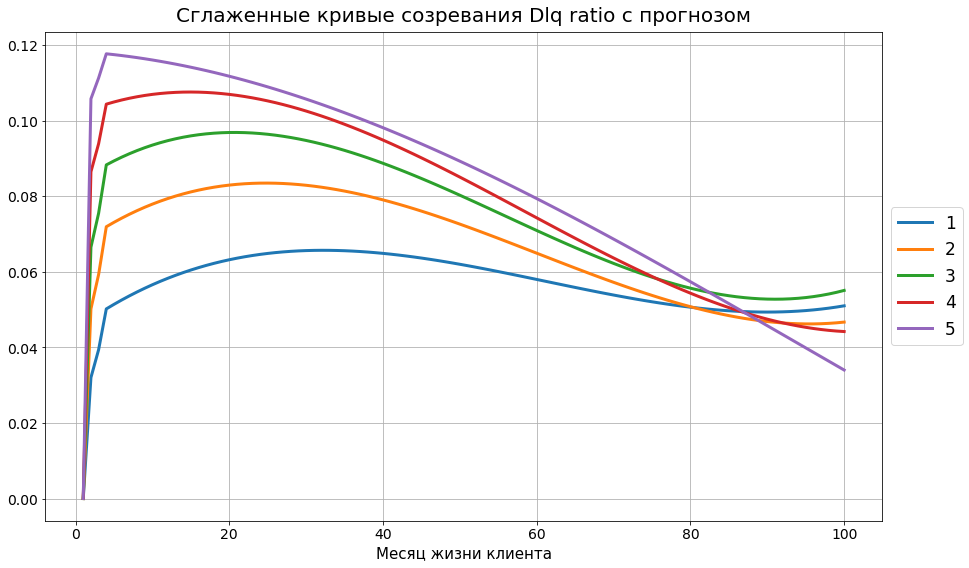

In [47]:
# Строим итоговый график
df_polynom_result_3.plot(figsize=(15, 9), grid=True, lw = 3)
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5), fontsize = '17')
plt.title("Сглаженные кривые созревания Dlq ratio с прогнозом", size=20, verticalalignment='bottom')
plt.xlabel("Месяц жизни клиента", size=15)
plt.tick_params(axis='both', which='major', labelsize=14)

### Далее рассматриваем прогнозы 1 и 3 как наилучшие
- Но в них есть минусы
- у 1 слишком резкий спад
- У 3 немного уходит наверх

#### Задание 4
* Построить прогноз для PD = 6%, PD = 1%, PD = 15% при помощи интерполяции и экстраполяции построенных кривых (***2 балла***)

Среднее значение PD в бакетах можно найти в поле pd_bucket_label исходного датасета

### Для 3 вида прогноза 

### Метод
- Для PD = 6% применяем интерполяцию по 5 и 7 (берем среднее по двум крайним бакетам)
- Для  PD = 1% и  PD = 15% применяем экстраполяцию по трем значениям (берем среднее по трем ближайшим бакетам с весами)

- Пояснения по бакетам в df_polynom_result
- 1 3%
- 2 5%
- 3 7%
- 4 9%
- 5 11%
- Далее будет так
- 6 6%
- 7 1%
- 8 13%
- 9 15%

##### PD = 6%

In [48]:
df_polynom_result_3[6] = (df_polynom_result_3[2] + df_polynom_result_3[3]) / 2

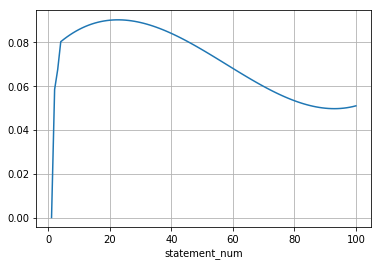

In [49]:
df_polynom_result_3[6].plot().grid(True)

##### PD = 1%

In [50]:
#по трем точкам ближайшим
df_polynom_result_3[7] = (df_polynom_result_3[1]/3 + df_polynom_result_3[2]/5 + df_polynom_result_3[3]/7) / 3

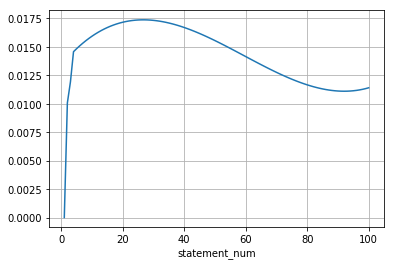

In [51]:
df_polynom_result_3[7].plot().grid(True)

##### PD = 13% (Он нам нужен для экстраполяции 15)

In [52]:
#по трем точкам ближайшим
df_polynom_result_3[8] = (df_polynom_result_3[3]*13/7 + df_polynom_result_3[4]*13/9+df_polynom_result_3[5]*13/11) / 3

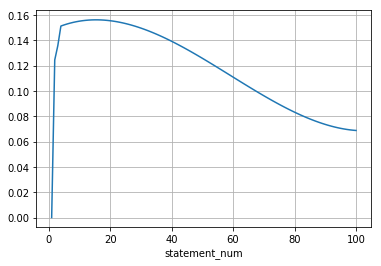

In [53]:
df_polynom_result_3[8].plot().grid(True)

##### PD = 15%

In [54]:
#по трем точкам ближайшим
df_polynom_result_3[9] = (df_polynom_result_3[4]*15/9+df_polynom_result_3[5]*15/11 + \
                       df_polynom_result_3[8]*15/13) / 3

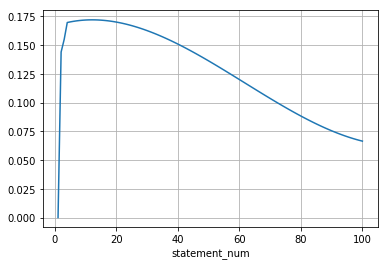

In [55]:
df_polynom_result_3[9].plot().grid(True)

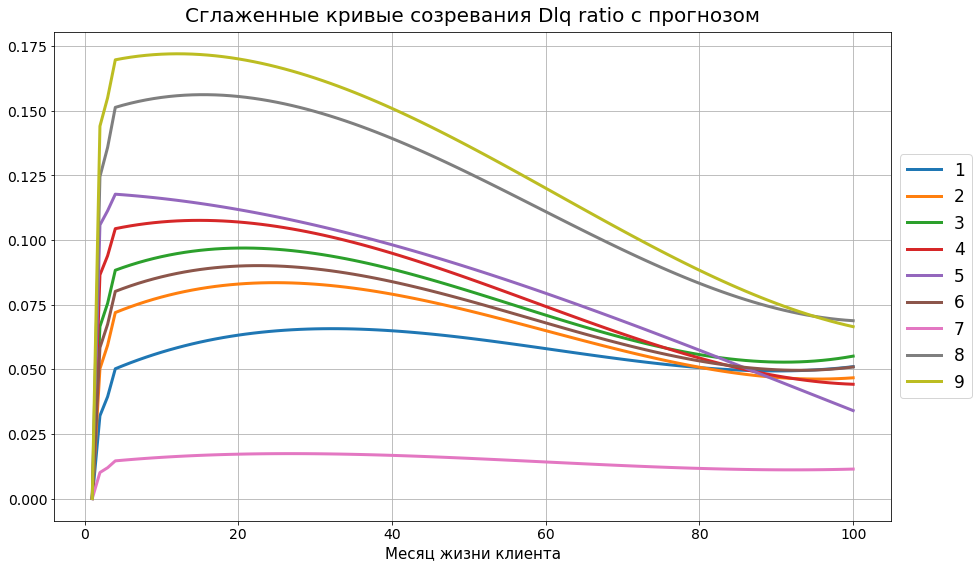

In [56]:
# Строим итоговый график
df_polynom_result_3.plot(figsize=(15, 9), grid=True, lw = 3)
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5), fontsize = '17')
plt.title("Сглаженные кривые созревания Dlq ratio с прогнозом", size=20, verticalalignment='bottom')
plt.xlabel("Месяц жизни клиента", size=15)
plt.tick_params(axis='both', which='major', labelsize=14)

In [57]:
def plot_curve_pd(pd):
    df_polynom_result_3[pd].plot().grid(True)

- Но данный подход не совсем верен для 1 и 15 PD, так как это похоже на скользящее среднее, но при этом сумма коэффициентов не равна единице
- Далее посмотрим на изменение кривых и подберем эмпирически соотношения кривых для построения 1 и 15 PD

### Посмотрим на точки каждой кривой:
- значение месяца в начале
- значение месяца в середине
- значение на 80 месяце
- возьмем среднюю разницу на каждой из точек
- возможно, среднее из точек
##### Далее вычтем разницу из 3 PD для нахождения 1, добавим удвоенную разницу к 11 PD для нахождения 15
- Далее смотрим на изначально сглаженные и продолженные бакеты 1-5

In [58]:
df_polynom_result_3[[1,2,3,4,5]].head()

,1,2,3,4,5
statement_num,,,,,
1,0.000002,-2.128890e-10,0.000005,0.000011,0.000018
2,0.032022,5.021253e-02,0.066522,0.086493,0.105804
3,0.039408,5.930446e-02,0.075516,0.093932,0.111320
4,0.050199,7.194739e-02,0.088311,0.104390,0.117721
5,0.051404,7.311571e-02,0.089374,0.104971,0.117500


In [59]:
df_differences = pd.DataFrame()

df_differences = df_differences.assign(difference12 = [abs( \
    df_polynom_result_3.iloc[i][1] - df_polynom_result_3.iloc[i][2]) for i in range(len(df_polynom_result_3))])

df_differences = df_differences.assign(difference23 = [abs( \
    df_polynom_result_3.iloc[i][2] - df_polynom_result_3.iloc[i][3]) for i in range(len(df_polynom_result_3))])

df_differences = df_differences.assign(difference34 = [abs( \
    df_polynom_result_3.iloc[i][3] - df_polynom_result_3.iloc[i][4]) for i in range(len(df_polynom_result_3))])

df_differences = df_differences.assign(difference45 = [abs( \
    df_polynom_result_3.iloc[i][4] - df_polynom_result_3.iloc[i][5]) for i in range(len(df_polynom_result_3))])

In [60]:
df_differences[5:10]

,difference12,difference23,difference34,difference45
5,0.021661,0.016145,0.015132,0.011767
6,0.021598,0.016025,0.014682,0.011044
7,0.021523,0.015897,0.014248,0.010359
8,0.021436,0.015763,0.013828,0.009712
9,0.021338,0.015623,0.013423,0.009102


In [61]:
df_polynom_result_3[7] = df_polynom_result_3[1] - df_differences.difference12 * 1.25
df_polynom_result_3[7].iloc[0] = 0

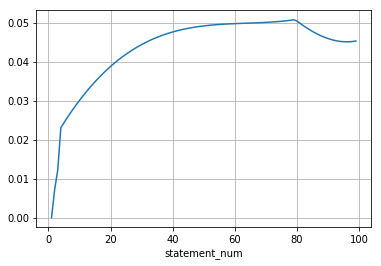

In [62]:
df_polynom_result_3[7].plot().grid(True)

In [63]:
df_polynom_result_3[9] = df_polynom_result_3[5] + df_differences.difference45 * 0.8 + df_differences.difference45 * 0.7

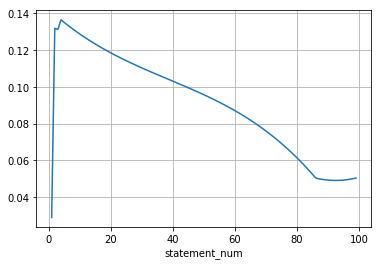

In [64]:
df_polynom_result_3[9].plot().grid(True)

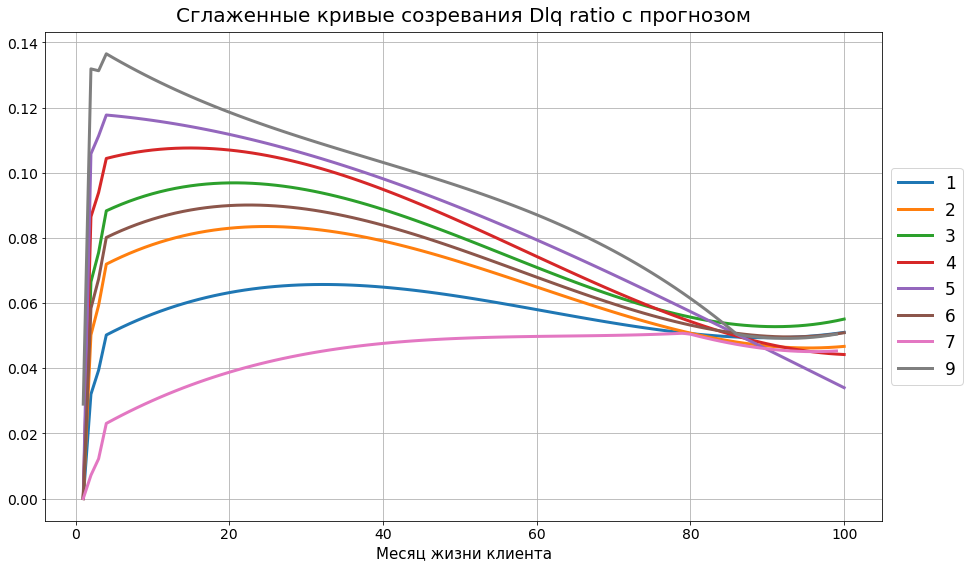

In [65]:
# Строим итоговый график
df_polynom_result_3[[1,2,3,4,5,6,7,9]].plot(figsize=(15, 9), grid=True, lw = 3)
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5), fontsize = '17')
plt.title("Сглаженные кривые созревания Dlq ratio с прогнозом", size=20, verticalalignment='bottom')
plt.xlabel("Месяц жизни клиента", size=15)
plt.tick_params(axis='both', which='major', labelsize=14)

### Для 1 вида прогноза

In [66]:
df_polynom_result_1[6] = (df_polynom_result_1[2] + df_polynom_result_1[3]) / 2

In [67]:
#по трем точкам ближайшим
df_polynom_result_1[7] = (df_polynom_result_1[1]/3 + df_polynom_result_1[2]/5 + df_polynom_result_1[3]/7) / 3

In [68]:
#по трем точкам ближайшим
df_polynom_result_1[8] = (df_polynom_result_1[3]*13/7 + df_polynom_result_1[4]*13/9+df_polynom_result_1[5]*13/11) / 3

In [69]:
#по трем точкам ближайшим
df_polynom_result_1[9] = (df_polynom_result_1[4]*15/9+df_polynom_result_1[5]*15/11 + \
                       df_polynom_result_1[8]*15/13) / 3

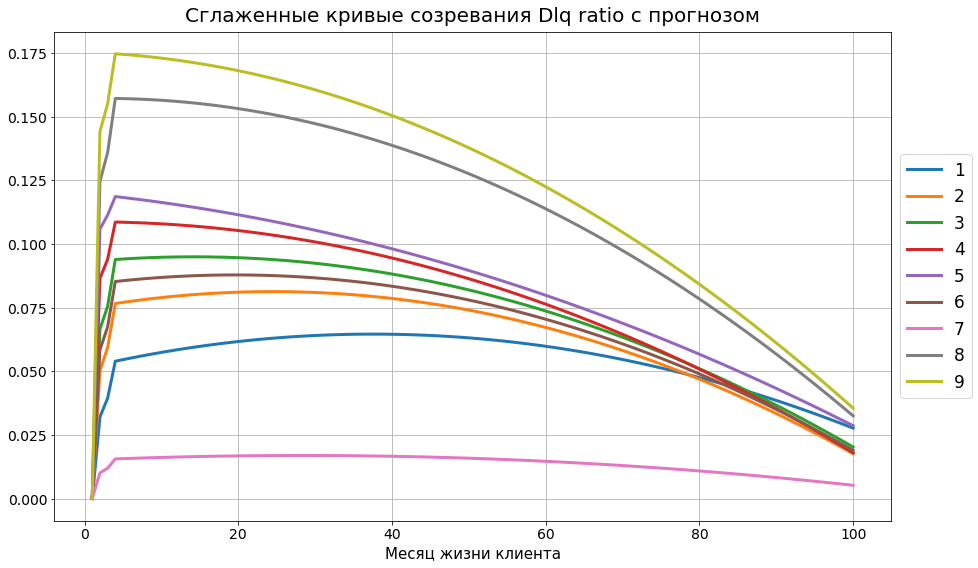

In [70]:
# Строим итоговый график
df_polynom_result_1.plot(figsize=(15, 9), grid=True, lw = 3)
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5), fontsize = '17')
plt.title("Сглаженные кривые созревания Dlq ratio с прогнозом", size=20, verticalalignment='bottom')
plt.xlabel("Месяц жизни клиента", size=15)
plt.tick_params(axis='both', which='major', labelsize=14)

In [71]:
def plot_curve_pd(pd):
    df_polynom_result_1[pd].plot().grid(True)

In [72]:
df_differences = pd.DataFrame()

df_differences = df_differences.assign(difference12 = [abs( \
    df_polynom_result_1.iloc[i][1] - df_polynom_result_1.iloc[i][2]) for i in range(len(df_polynom_result_1))])

df_differences = df_differences.assign(difference23 = [abs( \
    df_polynom_result_1.iloc[i][2] - df_polynom_result_1.iloc[i][3]) for i in range(len(df_polynom_result_1))])

df_differences = df_differences.assign(difference34 = [abs( \
    df_polynom_result_1.iloc[i][3] - df_polynom_result_1.iloc[i][4]) for i in range(len(df_polynom_result_1))])

df_differences = df_differences.assign(difference45 = [abs( \
    df_polynom_result_1.iloc[i][4] - df_polynom_result_1.iloc[i][5]) for i in range(len(df_polynom_result_1))])

In [73]:
df_polynom_result_1[7] = df_polynom_result_1[1] - df_differences.difference12 * 1.25
df_polynom_result_1[7].iloc[0] = 0

In [74]:
df_polynom_result_1[9] = df_polynom_result_1[5] + df_differences.difference45 * 0.8 + df_differences.difference45 * 0.7

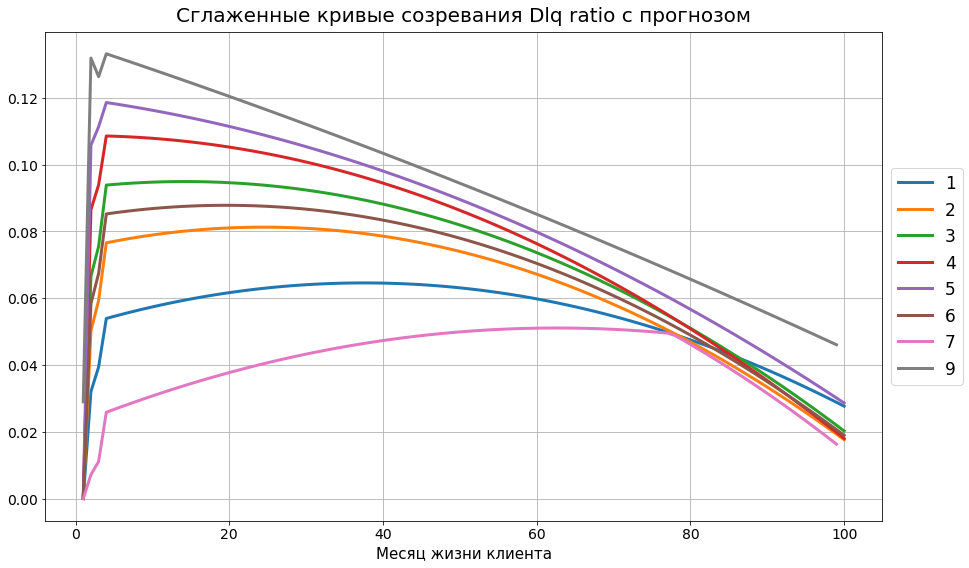

In [75]:
# Строим итоговый график
df_polynom_result_1[[1,2,3,4,5,6,7,9]].plot(figsize=(15, 9), grid=True, lw = 3)
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5), fontsize = '17')
plt.title("Сглаженные кривые созревания Dlq ratio с прогнозом", size=20, verticalalignment='bottom')
plt.xlabel("Месяц жизни клиента", size=15)
plt.tick_params(axis='both', which='major', labelsize=14)

### Вывод
- Интерполяция выполняется средним по ближайшим
- Экстраполяция первым методом может быть не совсем корректной
- Экстраполяция вторым методом берется на основе разности значений

## Построим кривую attrition rate

#### Считываем данные из датасета на странице домашки

In [3]:
# df = pd.read_csv(
#     'seminar7_20181101_homework.csv',
#     sep=";",
#     encoding= "cp1251",
#     date_parser=lambda x: pd.to_datetime(x, format='%d%b%Y'), #преобразуем даты
#     parse_dates=['generation_month']
# )
# df.head(10)

#### Задание 5
* Построить винтажи кривой attrition rate:
$$\text{Attrition rate}_n =  \frac{\text{#New ATR}_n}{\text{ACT}_{n-1}} = \frac{\text{#New ATR}_n}{\text{#TOTAL}_{n-1} - \text{ATR}_{n-1} - \text{DEF}_{n-1}}.$$ (***1 балл***)

Обратите внимание, что кривую attrition rate можно не разделять по показателю и рисовать для всей выборки в целом
* Реализовать разложение винтажей attrition rate на 3 составляющих: 
$$\text{Attrition rate}(t,n) = Q(n)\cdot M(t-n)\cdot E(t)$$
Изучить форму и логичность полученных решений $Q(n), M(t-n), E(t)$. (***5 баллов***) 

### Винтажи кривой attrition rate

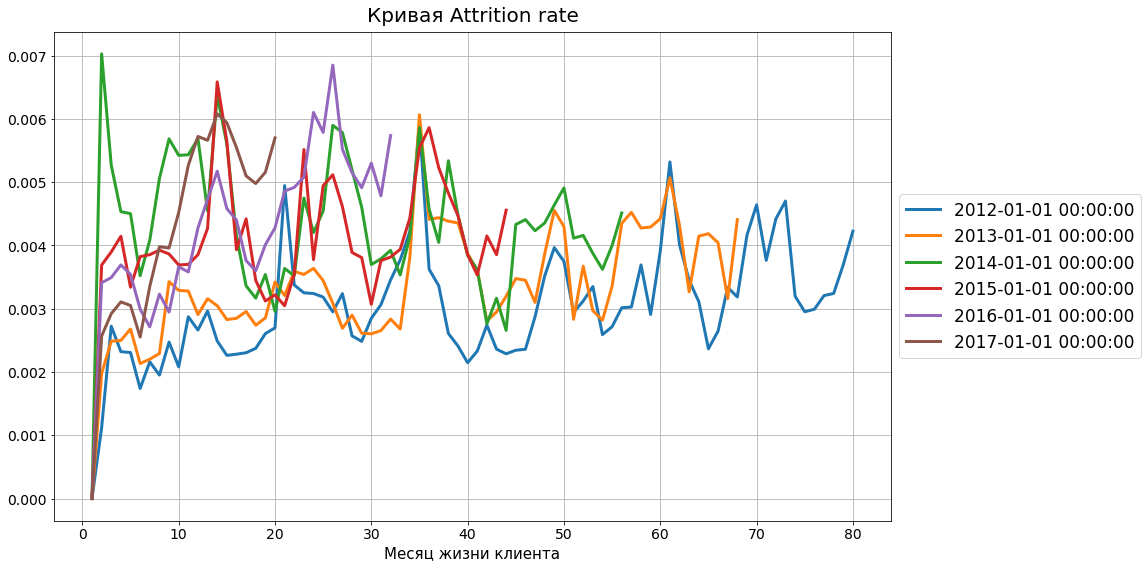

In [77]:
%matplotlib inline
# Выгружаем таблицу c винтажами
cur_df = df.query('''generation_month in ('2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01', '2016-01-01','2017-01-01') ''')
attrition_rate_data = cur_df.groupby(["generation_month", "statement_num"]).agg({"atr_rate":np.mean})

def plot_attrition_rate_by_generation(df):
# Your code goes here 
    (attrition_rate_data.unstack('generation_month')
            ['atr_rate']
            .plot(ax=None, figsize=(15, 9), grid=True, lw = 3))
    plt.legend(loc='center left',bbox_to_anchor=(1, 0.5), fontsize = '17')
    plt.title("Кривая Attrition rate", size=20, verticalalignment='bottom')
    plt.xlabel("Месяц жизни клиента", size=15)
    plt.tick_params(axis='both', which='major', labelsize=14)
    plt.show()
plot_attrition_rate_by_generation(attrition_rate_data)

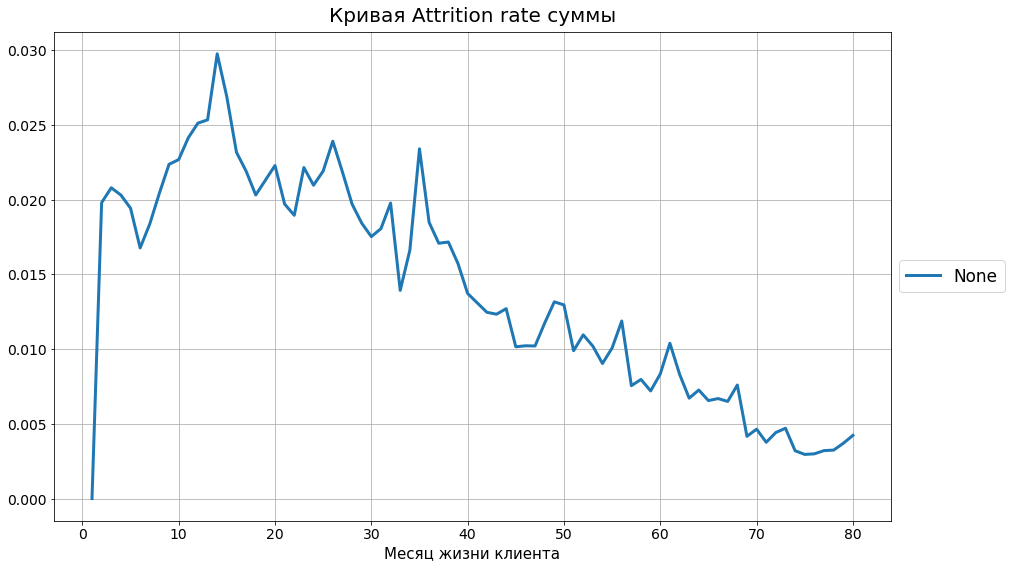

In [78]:
attrition_rate_data = cur_df.groupby(["statement_num"]).agg({"atr_rate":np.sum})
(attrition_rate_data.unstack('generation_month')['atr_rate'].plot(ax=None, figsize=(15, 9), grid=True, lw = 3))
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5), fontsize = '17')
plt.title("Кривая Attrition rate суммы", size=20, verticalalignment='bottom')
plt.xlabel("Месяц жизни клиента", size=15)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

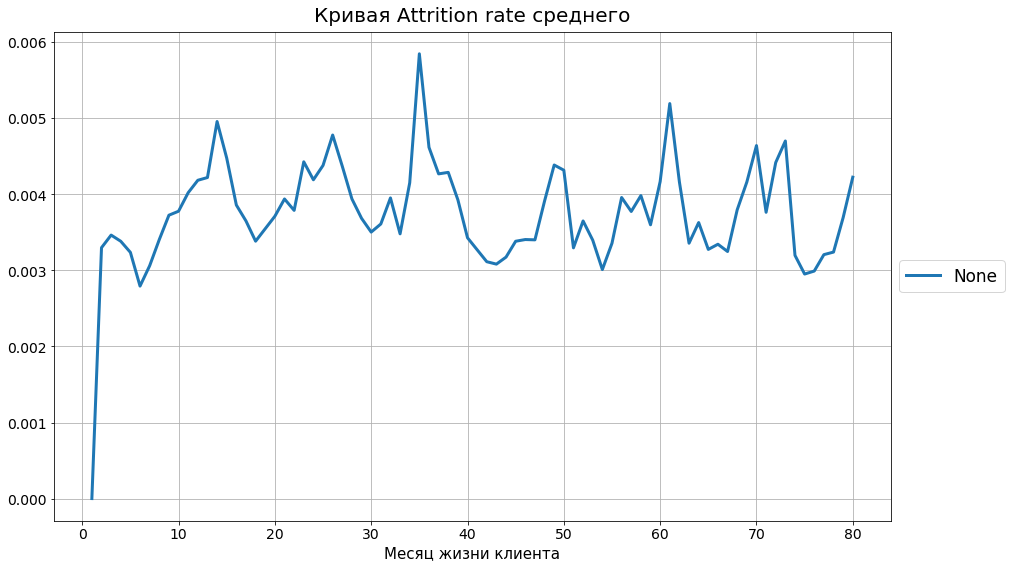

In [79]:
attrition_rate_data = cur_df.groupby(["statement_num"]).agg({"atr_rate":np.mean})
(attrition_rate_data.unstack('generation_month')['atr_rate'].plot(ax=None, figsize=(15, 9), grid=True, lw = 3))
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5), fontsize = '17')
plt.title("Кривая Attrition rate среднего", size=20, verticalalignment='bottom')
plt.xlabel("Месяц жизни клиента", size=15)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

### Разложение винтажей attrition rate на 3 составляющих

### (Пока на два)

In [90]:
def curve_build(data, 
                feature, 
                generation = 'generation_quart',
                statement_num = 'statement_num', 
                group_label = '1'):
    
    """Вспомогательная функция для построения разложения в рамках одного бакета
    
    **Аргументы**
    data : pandas.DataFrame
        таблица с данными
    feature: str
        название поля с исследуемой переменной
    generation : datetime
        название поля с поколениями
    where : str
        условие, которым мы ограничиваем выборку
    statement_num : int
        название поля с номером месяца жизни клиента
    group_label : str
        название поля группы
    **Результат**
    dictionary : dict
    """
    
    df_query = data.sort_values([generation, statement_num]).reset_index()

    # Рассчитываем количество поколений и тому подобное
    generation_min = df_query[generation].min()
    gen_cnt = df_query[statement_num].max()

    # Преобразуем Dataframe в набор векторов 
    values = np.array(df_query[feature])
    tab_size = df_query[feature].count()
    st_nums = np.array(df_query[statement_num] - 1)
    dates = np.array([0 for i in range(tab_size)])
    
    for i in range(tab_size):
         dates[i] = df_query.loc[i,generation].year * 12 + df_query.loc[i,generation].month -\
            generation_min.year * 12 - generation_min.month + df_query.loc[i,statement_num] - 1 

    # Определяем функционал, который будем минимизировать

    def r_square(x):
        temp = 0 
        for i in range(tab_size):
            if dates[i] >= 0:
                temp += (values[i] - x[dates[i]] * x[st_nums[i] + gen_cnt])**2
        return temp

    # Задаем callback для отслеживания прогресса минимизации
    def callbackF(Xi):
        global Nfeval
        print('%d  %.6f' % (Nfeval, r_square(Xi)))
        Nfeval += 1

    # Задаем начальное приближение в виде массива с нулевыми значениями

    x0 = np.array([0 for i in range(2*gen_cnt)])                                # Внешние воздействия

    # Численная минимизация

    print('Initial %.6f' % (r_square(x0)))
    res0 = minimize(r_square, x0, tol=1e-6, callback=callbackF, method='Powell', options = {'disp': False, 'maxiter': 1000})

    # Задаем датафрейм с внешними воздействиями
    external_data = pd.DataFrame({'month_dt': [generation_min + pd.DateOffset(months = i) for i in range(gen_cnt)], 
                             group_label: res0.x[:gen_cnt]})

    # Нормируем внешние воздействия таким образом, чтобы в среднем они равнялись единице. 
    ext_mean = external_data[external_data['month_dt'] > generation_min + pd.DateOffset(months = 6)][group_label].mean()
    external_data[group_label] = external_data[group_label] / ext_mean
    
    # И умножаем на полученный коэффициент кривые созревания
    
    maturation_array = np.transpose([res0.x[gen_cnt:2* gen_cnt] * ext_mean]).flatten()
    maturation_data = pd.DataFrame(data = {group_label: maturation_array, \
                                           'statement_num': np.arange(1,maturation_array.size + 1)})

    df_fitted = df_query.merge(right=external_data, on = 'month_dt')
    df_fitted['fitted_feature'] = df_fitted[feature] / df_fitted[group_label]

    # Формируем словарь c итоговыми данными
    res = {'res0': res0,
          'external_data': external_data,
          'maturation_data': maturation_data,
          'df_fitted': df_fitted}
    return res


def decomposition(df, 
                  generation = 'generation_month', 
                  group = 'bucket', 
                  statement_num = 'statement_num', 
                  feature = 'feature', 
                  optimization_query = ''):
    """Винтажи исследуемой переменной по календарному времени
    
    **Аргументы**
    df : pandas.DataFrame
        таблица с данными
    generation : datetime
        название поля с поколениями
    group : str
        название поля с бакетами
    statement_num : int
        название поля с номером выписки
    feature: str
        название поля с исследуемой переменной
    optimization_query: str
        ограничение выборки для оптимизации
    **Результат**
    dictionary : dict
    """

    # Разбираемся со случаем пустых аргументов
 
    if optimization_query == '':
        df_query = pd.DataFrame(df)
    else:
        df_query = df.query(optimization_query)
    
    timedelta = df_query[statement_num].apply(lambda x: pd.DateOffset(months=x-1))
    df_query['month_dt'] = df_query[generation] + timedelta
    
      # Формируем список бакетов
    
    df_query.sort_values(by = [group], inplace = True)
    groups = pd.Series(df_query[group].drop_duplicates())
    
    # Запускаем цикл по бакетам
    i = 0
    for g in groups:
        df_temp = df_query[df_query[group] == g]
        print(group + ' = ' + str(g))
        
        # Строим разложение для одного бакета
        res = curve_build(df_temp, 
                          feature = feature, 
                          generation = generation, 
                          statement_num = statement_num, 
                          group_label = str(g)
                         )
        df_fitted_temp = pd.DataFrame(res['df_fitted'])
        df_fitted_temp[group] = g

        # Если первый шаг в цикле, то формируем датафреймы из результатов минимизации
        if i == 0:
            external_data = pd.DataFrame(res['external_data'])[['month_dt', str(g)]]
            maturation_data = pd.DataFrame(res['maturation_data'])[[statement_num, str(g)]]
            df_fitted = pd.DataFrame(df_fitted_temp)
        # Если шаг не первый, то дописываем столбцы в результаты
        else:
            external_data = external_data.merge(right = res['external_data'], on = ['month_dt'])
            maturation_data = maturation_data.merge(right = res['maturation_data'], on = [statement_num])
            df_fitted = pd.concat([df_fitted, df_fitted_temp]) 
        i+=1
        
    res_multiple = {
                    'external_data': external_data,
                    'maturation_data': maturation_data,
                    'fitted_data': df_fitted
                   }    
    return res_multiple

In [91]:
df = df.assign(bucket = [0 for i in range(len(df))])

### Разложение на два

In [92]:
# Счетчик итераций
Nfeval = 0

# Проводим разложение кривых 
res = decomposition(df, 
                       generation = 'generation_month', 
                       group = 'bucket', 
                       statement_num = 'statement_num', 
                       feature = 'atr_rate')

/anaconda3/lib/python3.6/site-packages/pandas/core/indexes/datetimelike.py:809: PerformanceWarning: Adding/subtracting array of DateOffsets to DatetimeIndex not vectorized
  .format(cls=type(self).__name__), PerformanceWarning)


bucket = 0
Initial 0.054751
0  0.002995
1  0.001369
2  0.001329
3  0.001328
4  0.001328
5  0.001328


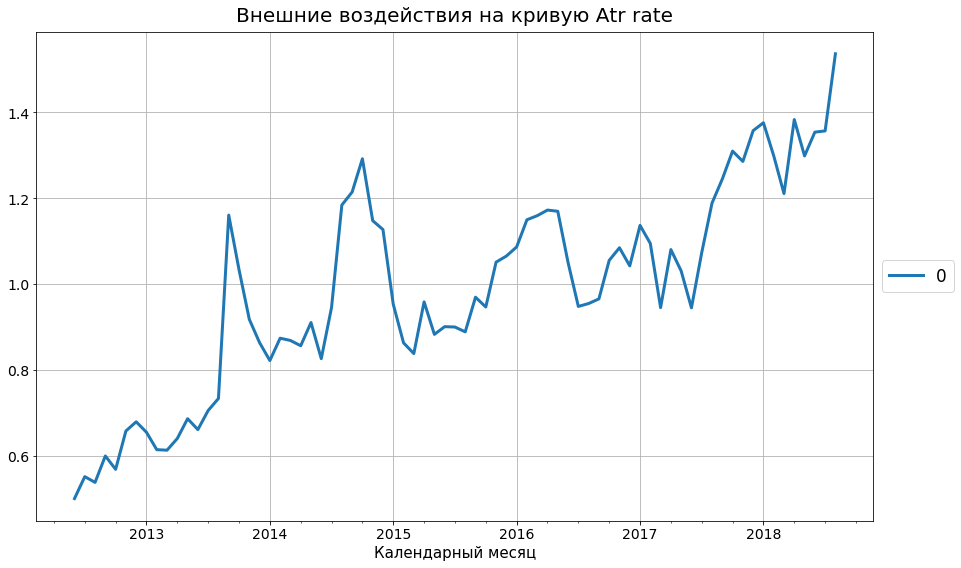

In [93]:
res['external_data'].query(''' month_dt >= '2012-06-01' ''')\
                    .set_index('month_dt')\
                    .plot(ax=None, figsize=(15, 9), grid=True, lw = 3)

plt.legend(loc='center left',bbox_to_anchor=(1, 0.5), fontsize = '17')
plt.title("Внешние воздействия на кривую Atr rate", size=20, verticalalignment='bottom')
plt.xlabel("Календарный месяц", size=15)
plt.tick_params(axis='both', which='major', labelsize=14)

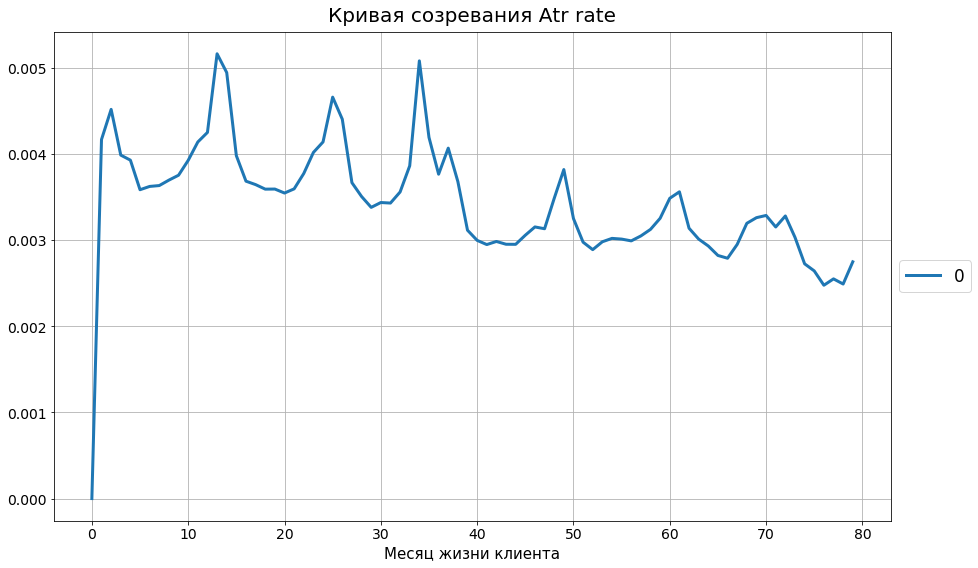

In [94]:
res['maturation_data'].drop('statement_num', 1).plot(ax=None, figsize=(15, 9), grid=True, lw = 3)

plt.legend(loc='center left',bbox_to_anchor=(1, 0.5), fontsize = '17')
plt.title("Кривая созревания Atr rate", size=20, verticalalignment='bottom')
plt.xlabel("Месяц жизни клиента", size=15)
plt.tick_params(axis='both', which='major', labelsize=14)

### Разложение на три

In [211]:
def curve_build(data, 
                feature, 
                generation = 'generation_quart',
                statement_num = 'statement_num', 
                group_label = '1'):
    
    """Вспомогательная функция для построения разложения в рамках одного бакета
    
    **Аргументы**
    data : pandas.DataFrame
        таблица с данными
    feature: str
        название поля с исследуемой переменной
    generation : datetime
        название поля с поколениями
    where : str
        условие, которым мы ограничиваем выборку
    statement_num : int
        название поля с номером месяца жизни клиента
    group_label : str
        название поля группы
    **Результат**
    dictionary : dict
    """
    
    df_query = data.sort_values([generation, statement_num]).reset_index()

    # Рассчитываем количество поколений и тому подобное
    generation_min = df_query[generation].min()
    gen_cnt = df_query[statement_num].max()

    # Преобразуем Dataframe в набор векторов 
    values = np.array(df_query[feature])
    tab_size = df_query[feature].count()
    st_nums = np.array(df_query[statement_num] - 1)  #st_nums[i] #t-n
    dates = np.array([0 for i in range(tab_size)]) #t
    
    for i in range(tab_size):
         dates[i] = df_query.loc[i,generation].year * 12 + df_query.loc[i,generation].month -\
            generation_min.year * 12 - generation_min.month + df_query.loc[i,statement_num] - 1 

    # Определяем функционал, который будем минимизировать

    def r_square(x):
        temp = 0 
        for i in range(tab_size):
            if dates[i] >= 0:
                temp += (values[i] - x[dates[i]] * x[st_nums[i] + gen_cnt] * x[dates[i]-st_nums[i] + 2 * gen_cnt])**2
        return temp

    # Задаем callback для отслеживания прогресса минимизации
    def callbackF(Xi):
        global Nfeval
        print('%d  %.6f' % (Nfeval, r_square(Xi)))
        Nfeval += 1

    # Задаем начальное приближение в виде массива с нулевыми значениями

    x0 = np.array([0 for i in range(3*gen_cnt)])                                # Внешние воздействия, качество поколения

    # Численная минимизация

    print('Initial %.6f' % (r_square(x0)))
    res0 = minimize(r_square, x0, tol=1e-6, callback=callbackF, method='Powell', options = {'disp': False, 'maxiter': 1000})

    # Задаем датафрейм с внешними воздействиями
    external_data = pd.DataFrame({'month_dt': [generation_min + pd.DateOffset(months = i) for i in range(gen_cnt)], 
                             group_label: res0.x[:gen_cnt]})

    # Нормируем внешние воздействия таким образом, чтобы в среднем они равнялись единице. 
    ext_mean = external_data[external_data['month_dt'] > generation_min + pd.DateOffset(months = 6)][group_label].mean()
    external_data[group_label] = external_data[group_label] / ext_mean
    
    # И умножаем на корень полученного коэффициента кривые созревания
    
    maturation_array = np.transpose([res0.x[gen_cnt:2* gen_cnt] * np.sqrt(ext_mean)]).flatten()
    maturation_data = pd.DataFrame(data = {group_label: maturation_array, \
                                           'statement_num': np.arange(1,maturation_array.size + 1)})
    #Качество поколения
    generation_quality_array = np.transpose([res0.x[2*gen_cnt:3* gen_cnt] * np.sqrt(ext_mean)]).flatten()
    generation_quality_data = pd.DataFrame(data = {group_label: generation_quality_array, \
                                           'generation': np.arange(1,generation_quality_array.size + 1)})

    df_fitted = df_query.merge(right=external_data, on = 'month_dt')
    df_fitted['fitted_feature'] = df_fitted[feature] / df_fitted[group_label]

    # Формируем словарь c итоговыми данными
    res = {'res0': res0,
          'external_data': external_data,
          'maturation_data': maturation_data,
            'generation_quality_data': generation_quality_data,
          'df_fitted': df_fitted}
    return res


def decomposition(df, 
                  generation = 'generation_month', 
                  group = 'bucket', 
                  statement_num = 'statement_num', 
                  feature = 'feature', 
                  optimization_query = ''):
    """Винтажи исследуемой переменной по календарному времени
    
    **Аргументы**
    df : pandas.DataFrame
        таблица с данными
    generation : datetime
        название поля с поколениями
    group : str
        название поля с бакетами
    statement_num : int
        название поля с номером выписки
    feature: str
        название поля с исследуемой переменной
    optimization_query: str
        ограничение выборки для оптимизации
    **Результат**
    dictionary : dict
    """

    # Разбираемся со случаем пустых аргументов
 
    if optimization_query == '':
        df_query = pd.DataFrame(df)
    else:
        df_query = df.query(optimization_query)
    
    timedelta = df_query[statement_num].apply(lambda x: pd.DateOffset(months=x-1))
    df_query['month_dt'] = df_query[generation] + timedelta
    
      # Формируем список бакетов
    
    df_query.sort_values(by = [group], inplace = True)
    groups = pd.Series(df_query[group].drop_duplicates())
    
    # Запускаем цикл по бакетам
    i = 0
    for g in groups:
        df_temp = df_query[df_query[group] == g]
        print(group + ' = ' + str(g))
        
        # Строим разложение для одного бакета
        res = curve_build(df_temp, 
                          feature = feature, 
                          generation = generation, 
                          statement_num = statement_num, 
                          group_label = str(g)
                         )
        df_fitted_temp = pd.DataFrame(res['df_fitted'])
        df_fitted_temp[group] = g

        # Если первый шаг в цикле, то формируем датафреймы из результатов минимизации
        if i == 0:
            external_data = pd.DataFrame(res['external_data'])[['month_dt', str(g)]]
            maturation_data = pd.DataFrame(res['maturation_data'])[[statement_num, str(g)]]
            generation_quality_data = pd.DataFrame(res['generation_quality_data'])[['generation', str(g)]]
            df_fitted = pd.DataFrame(df_fitted_temp)
        # Если шаг не первый, то дописываем столбцы в результаты
        else:
            external_data = external_data.merge(right = res['external_data'], on = ['month_dt'])
            maturation_data = maturation_data.merge(right = res['maturation_data'], on = [statement_num])
            generation_quality_data = generation_data.merge(right = res['generation_quality_data'], on = ['generation'])
            df_fitted = pd.concat([df_fitted, df_fitted_temp]) 
        i+=1
    res_multiple = {
                    'external_data': external_data,
                    'maturation_data': maturation_data,
                    'generation_quality_data': generation_quality_data,
                    'fitted_data': df_fitted
                   }    
    return res_multiple

In [212]:
# Счетчик итераций
Nfeval = 0

# Проводим разложение кривых 
res = decomposition(df, 
                       generation = 'generation_month', 
                       group = 'bucket', 
                       statement_num = 'statement_num', 
                       feature = 'atr_rate')

/anaconda3/lib/python3.6/site-packages/pandas/core/indexes/datetimelike.py:809: PerformanceWarning: Adding/subtracting array of DateOffsets to DatetimeIndex not vectorized
  .format(cls=type(self).__name__), PerformanceWarning)


bucket = 0
Initial 0.054751
0  0.004065
1  0.001058
2  0.001046
3  0.001046
4  0.001046
5  0.001046


### Ваши графики и выводы

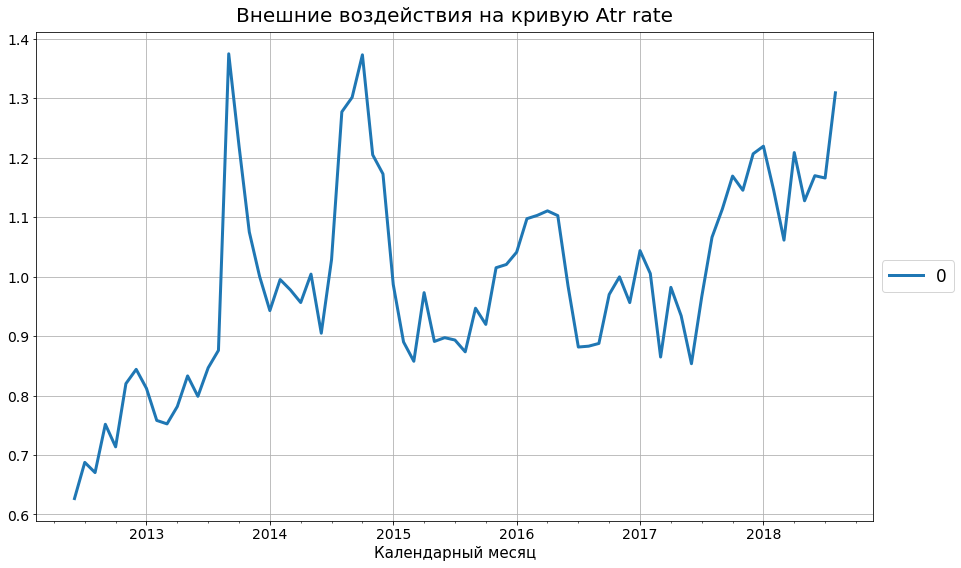

In [213]:
res['external_data'].query(''' month_dt >= '2012-06-01' ''')\
                    .set_index('month_dt')\
                    .plot(ax=None, figsize=(15, 9), grid=True, lw = 3)

plt.legend(loc='center left',bbox_to_anchor=(1, 0.5), fontsize = '17')
plt.title("Внешние воздействия на кривую Atr rate", size=20, verticalalignment='bottom')
plt.xlabel("Календарный месяц", size=15)
plt.tick_params(axis='both', which='major', labelsize=14)

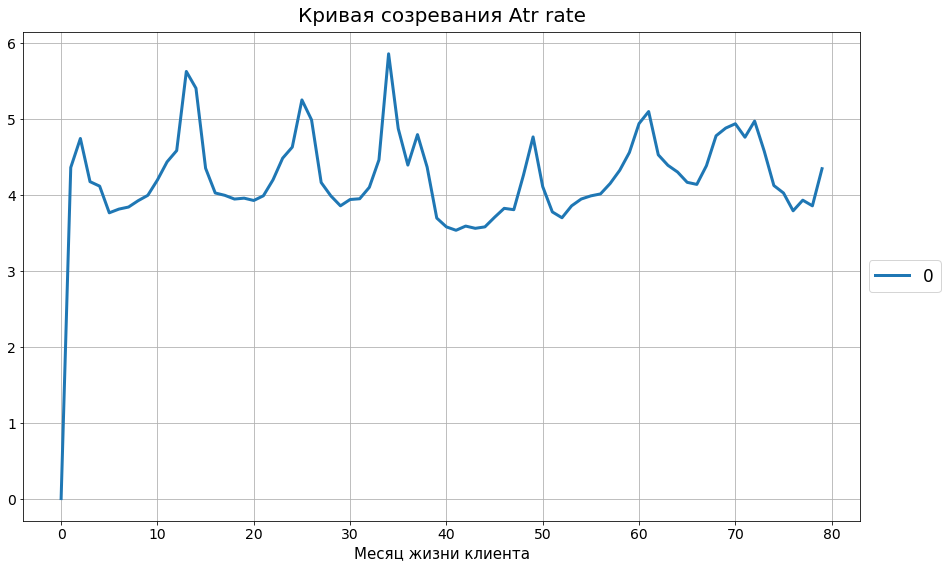

In [214]:
res['maturation_data'].drop('statement_num', 1).plot(ax=None, figsize=(15, 9), grid=True, lw = 3)

plt.legend(loc='center left',bbox_to_anchor=(1, 0.5), fontsize = '17')
plt.title("Кривая созревания Atr rate", size=20, verticalalignment='bottom')
plt.xlabel("Месяц жизни клиента", size=15)
plt.tick_params(axis='both', which='major', labelsize=14)

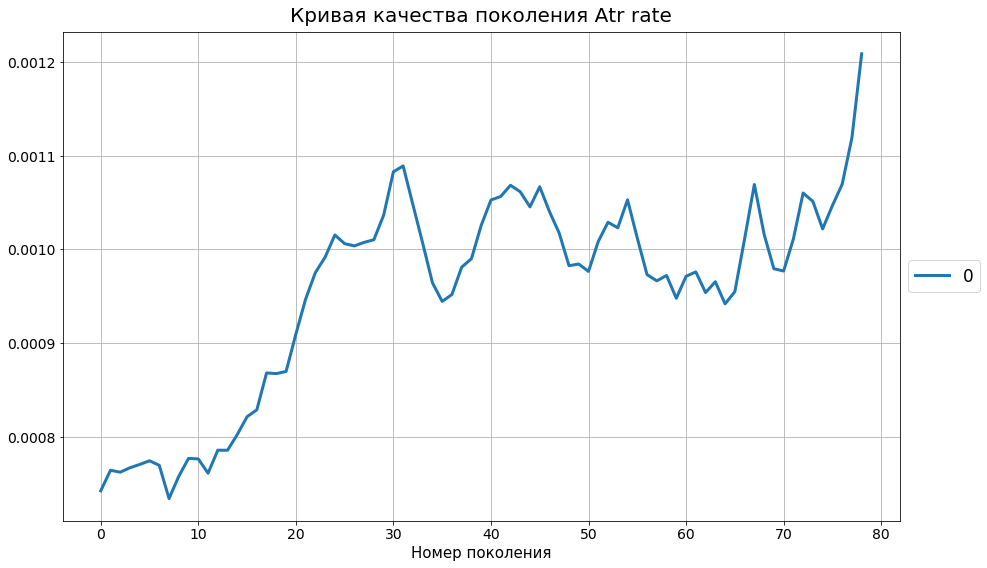

In [215]:
res['generation_quality_data'][:-1].drop('generation', 1).plot(ax=None, figsize=(15, 9), grid=True, lw = 3)

plt.legend(loc='center left',bbox_to_anchor=(1, 0.5), fontsize = '17')
plt.title("Кривая качества поколения Atr rate", size=20, verticalalignment='bottom')
plt.xlabel("Номер поколения", size=15)
plt.tick_params(axis='both', which='major', labelsize=14)

### Выводы
- Сравниваем полученные кривые с изначально построенной для attrition rate и разложением на две составляющие
- Внешние воздействия сохранили характерные особенности во второй половине 2013, конце 2014 и рост после середины 2016
- Но значения пиков стали больше, что связано с учетом качества поколения, что вносит вклад в разложение
- (по сравнению с разложением на два)
- 
- Кривые созревания сохранили особенность в наибольшем пике, но теперь медленнее уменьшаются
- Данная скорость замедлилась из-за отдельного множителя качества поколения
- (по сравнению с разложением на два)
- 
- Кривая качества поколения в среднем растет с номером поколения
- Возможно, вид данного графика не до конца отражает поведение attrition rate и
- Чтобы иметь логичность, следует оценивать несколько кривых разложения в совокупности
- Что связано с изменением финансовой ситуации и зависимостью кривой качества от поколения

##### Выводы по самим зависимостям кривых (как для разложения на 2, так и на 3)
- Как и ранее, внешние воздействия логичны, изменение в 2013 году связано с кризисом перекредитования
- Конец 2014 - финансовый кризис
- Пики на кривых созревания связаны с взиманием платы по кредитной карте каждые 12 месяцев,
- закрытием счета и/или погашением задолженности

## Дедлайн: 23:59:00 15 ноября 2018